In [1]:
import os
import zipfile

ZIP_FILE_PATH = '/content/Kaggle 2025 Competition Data.zip'
EXTRACTION_DIR = '/content/dataset_extracted'

print(f"--- Распаковка данных из {ZIP_FILE_PATH} ---")
    
if not os.path.exists(EXTRACTION_DIR):
    os.makedirs(EXTRACTION_DIR)
    print(f"Создана директория: {EXTRACTION_DIR}")

with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACTION_DIR)
print(f"Данные успешно распакованы в {EXTRACTION_DIR}")

print("Содержимое директории после распаковки:", os.listdir(EXTRACTION_DIR))
if 'data' not in os.listdir(EXTRACTION_DIR):
        print("ПРЕДУПРЕЖДЕНИЕ: Папка 'data' не найдена напрямую в EXTRACTION_DIR.")


BASE_DIR = EXTRACTION_DIR

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')

SUBMISSION_FILE = '/content/DL 2025 Competition 1 Submission.csv'


print(f"Используется sample_submission: {SUBMISSION_FILE}")
print(f"Используется директория train: {TRAIN_DIR}")
print(f"Используется директория test: {TEST_DIR}")

OUTPUT_DIR = '/content/output/'


--- Распаковка данных из /content/Kaggle 2025 Competition Data.zip ---
Создана директория: /content/dataset_extracted


FileNotFoundError: [Errno 2] No such file or directory: '/content/Kaggle 2025 Competition Data.zip'

In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random



print(f"--- Шаг 1: Анализ данных в {TRAIN_DIR} ---")


class_names = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
num_classes = len(class_names)
print(f"Обнаружено классов: {num_classes}")

image_counts = {}
total_images = 0
image_paths_dict = {}
first_image_size = None
first_image_path = None

print("Подсчет изображений по классам...")
for class_name in class_names:
    class_path = os.path.join(TRAIN_DIR, class_name)
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    count = len(files)
    image_counts[class_name] = count
    total_images += count
    image_paths_dict[class_name] = [os.path.join(class_path, f) for f in files]
    if first_image_size is None and count > 0:
            try:
                first_image_path = image_paths_dict[class_name][0]
                with Image.open(first_image_path) as img:
                    first_image_size = img.size
            except Exception as e:
                print(f"Не удалось прочитать размер первого изображения в классе {class_name}: {e}")


print(f"Всего обучающих изображений: {total_images}")
if first_image_size:
    print(f"Размер примера изображения (Ш x В): {first_image_size}")
else:
    print("Не удалось определить размер изображений.")

if num_classes > 0:
    counts_series = pd.Series(image_counts)
    print("\nСтатистика по количеству изображений в классе:")
    print(f"Минимум: {counts_series.min()}")
    print(f"Максимум: {counts_series.max()}")
    print(f"Среднее: {counts_series.mean():.2f}")
    print(f"Медиана: {counts_series.median()}")

    print("\nВизуализация баланса классов...")
    plt.figure(figsize=(20, 7))
    sns.barplot(x=counts_series.index, y=counts_series.values, palette="viridis")
    plt.title(f'Распределение изображений по {num_classes} классам', fontsize=16)
    plt.xlabel('Класс', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    if num_classes > 50:
            plt.xticks(rotation=90, fontsize=6)
    else:
            plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print("\nВизуализация представителей классов...")
    num_representatives_to_show = min(10, num_classes)
    classes_to_show = random.sample(class_names, num_representatives_to_show)

    fig, axes = plt.subplots(1, num_representatives_to_show, figsize=(15, 3))
    if num_representatives_to_show == 1:
            axes = [axes] 

    fig.suptitle(f'Примеры изображений из {num_representatives_to_show} случайных классов', fontsize=14)

    for i, class_name in enumerate(classes_to_show):
            if class_name in image_paths_dict and image_paths_dict[class_name]:
                img_path = random.choice(image_paths_dict[class_name])
                try:
                    img = Image.open(img_path)
                    ax = axes[i]
                    ax.imshow(np.array(img)) 
                    ax.set_title(f'Класс: {class_name}', fontsize=10)
                    ax.axis('off')
                except Exception as e:
                    print(f"Не удалось загрузить/отобразить изображение {img_path}: {e}")
                    axes[i].set_title(f'Ошибка\nКласс: {class_name}', fontsize=10)
                    axes[i].axis('off')
            else:
                axes[i].set_title(f'Нет изобр.\nКласс: {class_name}', fontsize=10)
                axes[i].axis('off')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

 

print("--- Анализ данных завершен ---")

NameError: name 'TRAIN_DIR' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

counts_series = pd.Series(image_counts)
counts_df = counts_series.reset_index()
counts_df.columns = ['class_name', 'count']
counts_df = counts_df.sort_values('count')

N = 5 
print(f"\n--- Топ-{N} наименее представленных классов ---")
print(counts_df.head(N))

print(f"\n--- Топ-{N} наиболее представленных классов ---")
print(counts_df.tail(N))

print("\n--- Гистограмма баланса классов (отсортированная) ---")
plt.figure(figsize=(20, 7))
sns.barplot(x='class_name', y='count', data=counts_df, palette="viridis")
plt.title(f'Распределение изображений по {len(counts_df)} классам (отсортировано)', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
if len(counts_df) > 50:
     plt.xticks(rotation=90, fontsize=6)
else:
     plt.xticks(rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import random


BATCH_SIZE = 64
NUM_WORKERS = 2 
IMG_SIZE = 32 


print(f"\n--- Шаг 2: Определение аугментаций и создание DataLoader ---")

transforms_basic = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])



transforms_advanced_train = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2), 
    
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.7, border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, fill_value=0, p=0.5), 
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    ToTensorV2(), 
])


transforms_val_test = A.Compose([
    
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

print("Определены 3 пайплайна аугментаций:")
print("1. Базовый (flips + normalize)")
print("2. Продвинутый (train: flips, shift-scale-rotate, color jitter, coarse dropout, normalize)")
print("3. Валидационный/Тестовый (normalize)")

In [3]:

class ImageFolderAlbumentations(Dataset):
    def __init__(self, root, transform=None):
        self.image_folder = datasets.ImageFolder(root=root)
        self.transform = transform
        self.classes = self.image_folder.classes
        self.class_to_idx = self.image_folder.class_to_idx
        self.samples = self.image_folder.samples 

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        
        
        image = Image.open(img_path).convert('RGB')
        image_np = np.array(image) 

        if self.transform:
            augmented = self.transform(image=image_np)
            image_tensor = augmented['image']
        else:
            
            image_tensor = ToTensorV2()(image=image_np)['image']

        return image_tensor, target


print(f"\nСоздание полного обучающего датасета с ПРОДВИНУТЫМИ аугментациями...")
full_train_dataset_advanced = ImageFolderAlbumentations(
    root=TRAIN_DIR,
    transform=transforms_advanced_train
)


class_names = full_train_dataset_advanced.classes
num_classes = len(class_names)
print(f"Количество классов в датасете: {num_classes}")



full_train_loader_advanced = DataLoader(
    dataset=full_train_dataset_advanced,
    batch_size=BATCH_SIZE,
    shuffle=True, 
    num_workers=NUM_WORKERS,
    pin_memory=True 
)
print(f"Создан DataLoader 'full_train_loader_advanced' с batch_size={BATCH_SIZE}")

print("\nПроверка работы DataLoader (получение одного батча)...")

images_batch, labels_batch = next(iter(full_train_loader_advanced))
print(f"Размер батча изображений: {images_batch.shape}") 
print(f"Тип данных изображений: {images_batch.dtype}") 
print(f"Размер батча меток: {labels_batch.shape}") 
print(f"Тип данных меток: {labels_batch.dtype}") 


print("\nВизуализация нескольких аугментированных изображений из первого батча...")
num_images_to_show = 8
plt.figure(figsize=(12, 6))

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
for i in range(min(num_images_to_show, BATCH_SIZE)):
    ax = plt.subplot(2, num_images_to_show // 2, i + 1)
    img = images_batch[i]
    img = inv_normalize(img) 
    img = img.permute(1, 2, 0).numpy() 
    img = np.clip(img, 0, 1) 
    label = class_names[labels_batch[i].item()] 
    plt.imshow(img)
    plt.title(f"Class: {label}")
    plt.axis("off")
plt.suptitle("Примеры аугментированных изображений (Train Advanced)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NameError: name 'Dataset' is not defined

In [ ]:
import os
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets, models, transforms
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from tqdm.notebook import tqdm 



SEED = 42
VALID_SPLIT = 0.2 
BASE_IMG_SIZE = 32
TRANSFER_IMG_SIZE = 224 
BATCH_SIZE = 64
NUM_WORKERS = 2
EPOCHS = 30 
LR = 1e-3
WEIGHT_DECAY = 1e-4
SCHEDULER_STEP = 10
SCHEDULER_GAMMA = 0.1
EARLY_STOPPING_PATIENCE = 5 
WARMUP_EPOCHS = 3 


random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {DEVICE}")


transforms_basic_train = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])


transforms_advanced_train = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.7, border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, fill_value=0, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])


transforms_basic_val = A.Compose([
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

transforms_transfer_basic_train = A.Compose([
    A.Resize(height=TRANSFER_IMG_SIZE, width=TRANSFER_IMG_SIZE, interpolation=cv2.INTER_LINEAR), 
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])


transforms_transfer_advanced_train = A.Compose([
    A.Resize(height=TRANSFER_IMG_SIZE, width=TRANSFER_IMG_SIZE, interpolation=cv2.INTER_LINEAR), 
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.7, border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    
    A.CoarseDropout(max_holes=8, max_height=int(TRANSFER_IMG_SIZE * 0.1), max_width=int(TRANSFER_IMG_SIZE * 0.1),
                    min_holes=1, min_height=int(TRANSFER_IMG_SIZE * 0.05), min_width=int(TRANSFER_IMG_SIZE * 0.05),
                    fill_value=0, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])


transforms_transfer_val = A.Compose([
    A.Resize(height=TRANSFER_IMG_SIZE, width=TRANSFER_IMG_SIZE, interpolation=cv2.INTER_LINEAR), 
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

print("Пайплайны аугментаций определены (включая ресайз для Transfer Learning).")

--- Шаг 3: Подготовка к обучению моделей ---
Используется устройство: cuda
Пайплайны аугментаций определены (включая ресайз для Transfer Learning).


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-10-c46b9b94f673>:78: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, fill_value=0, p=0.5),
<ipython-input-10-c46b9b94f673>:109: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=int(TRANSFER_IMG_SIZE * 0.1), max_width=int(TRANSFER_IMG_SIZE * 0.1),


In [ ]:
class ImageFolderAlbumentations(Dataset):
    def __init__(self, root, transform=None, target_transform=None): 
        
        self.image_folder = datasets.ImageFolder(root=root, target_transform=target_transform)
        self.transform = transform
        self.classes = self.image_folder.classes
        self.class_to_idx = self.image_folder.class_to_idx
        self.samples = self.image_folder.samples 
        self.targets = self.image_folder.targets 

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        
        image = Image.open(img_path).convert('RGB')
        image_np = np.array(image) 

        if self.transform:
            augmented = self.transform(image=image_np)
            image_tensor = augmented['image']
        else:
            
            image_tensor = ToTensorV2()(image=image_np)['image']

        return image_tensor, target


full_dataset_no_transform = ImageFolderAlbumentations(root=TRAIN_DIR)
num_classes = len(full_dataset_no_transform.classes)
print(f"Обнаружено {num_classes} классов.")
print(f"Общий размер датасета: {len(full_dataset_no_transform)}")

targets = full_dataset_no_transform.targets
train_idx, val_idx = train_test_split(
    np.arange(len(targets)),
    test_size=VALID_SPLIT,
    shuffle=True,
    stratify=targets, 
    random_state=SEED
)
print(f"Размер обучающей выборки: {len(train_idx)}")
print(f"Размер валидационной выборки: {len(val_idx)}")

def create_dataloaders(train_indices, val_indices, root_dir,
                       train_transform, val_transform, batch_size, num_workers):
    
    train_dataset = Subset(ImageFolderAlbumentations(root=root_dir, transform=train_transform), train_indices)
    val_dataset = Subset(ImageFolderAlbumentations(root=root_dir, transform=val_transform), val_indices)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True) 

    return train_loader, val_loader

Обнаружено 100 классов.
Общий размер датасета: 9510
Размер обучающей выборки: 7608
Размер валидационной выборки: 1902


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=100):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) 
        self.bn3 = nn.BatchNorm2d(128)

        
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1) 
        x = self.relu4(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


def get_transfer_model(num_classes=100, pretrained=True):
    model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1 if pretrained else None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

print("Модели определены (SimpleCNN, ResNet18).")

Модели определены (SimpleCNN, ResNet18).


In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer, device, current_epoch, total_epochs, warmup_epochs, base_lr, scheduler=None):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    
    if current_epoch < warmup_epochs:
        lr = base_lr * (current_epoch + 1) / warmup_epochs
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        current_lr = lr
    else:
        
        if scheduler:
             current_lr = scheduler.get_last_lr()[0] 
        else:
             current_lr = optimizer.param_groups[0]['lr'] 


    progress_bar = tqdm(train_loader, desc=f"Epoch {current_epoch+1}/{total_epochs} (Train) LR={current_lr:.1e}", leave=False)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)
        total_samples += inputs.size(0)

        progress_bar.set_postfix(loss=f"{loss.item():.4f}")

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions.double() / total_samples

    
    if scheduler and current_epoch >= warmup_epochs:
        scheduler.step() 

    return epoch_loss, epoch_acc.item()


def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    progress_bar = tqdm(val_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
            total_samples += inputs.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions.double() / total_samples

    return epoch_loss, epoch_acc.item()

In [ ]:
def train_model(model, model_name, train_loader, val_loader, criterion, optimizer, scheduler, device,
                num_epochs, output_dir, warmup_epochs, base_lr, early_stopping_patience):

    print(f"\n--- Обучение модели: {model_name} ---")
    start_time = time.time()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}
    best_val_acc = 0.0
    best_model_state = None
    epochs_no_improve = 0
    model.to(device)

    for epoch in range(num_epochs):
        
        train_loss, train_acc = train_one_epoch(
            model, train_loader, criterion, optimizer, device,
            epoch, num_epochs, warmup_epochs, base_lr, scheduler if epoch >= warmup_epochs else None
        )

        val_loss, val_acc = validate(model, val_loader, criterion, device)
        current_lr = optimizer.param_groups[0]['lr']
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['lr'].append(current_lr)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} | LR: {current_lr:.1e}")

        
        if val_acc > best_val_acc:
            print(f"Validation accuracy улучшилась ({best_val_acc:.4f} --> {val_acc:.4f}). Сохранение модели...")
            best_val_acc = val_acc
            best_model_state = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0 
            best_model_path = os.path.join(output_dir, f'{model_name}_best.pth')
            torch.save(best_model_state, best_model_path)
            print(f"Лучшая модель сохранена в: {best_model_path}")
        else:
            epochs_no_improve += 1
            print(f"Validation accuracy не улучшилась. Счетчик: {epochs_no_improve}/{early_stopping_patience}")

        if epochs_no_improve >= early_stopping_patience:
            print(f"\nРанняя остановка на эпохе {epoch+1}. Лучшая Val Acc: {best_val_acc:.4f}")
            break

    
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Загружена лучшая модель с Val Acc: {best_val_acc:.4f}")

    time_elapsed = time.time() - start_time
    print(f'\nОбучение {model_name} завершено за {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Лучшая Val Acc для {model_name}: {best_val_acc:4f}')

    return model, history, best_val_acc

In [ ]:
def plot_history(history, model_name):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history['train_loss'], 'bo-', label='Train Loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history['train_acc'], 'bo-', label='Train Acc')
    plt.plot(epochs, history['val_acc'], 'ro-', label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 3, 3)
    plt.plot(epochs, history['lr'], 'go-', label='Learning Rate')
    plt.title(f'{model_name} - Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('LR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.suptitle(f"История обучения для {model_name}", y=1.02, fontsize=16)
    plt.show()

In [ ]:
def tta_validate(model, val_loader, device, n_augmentations=2):
    model.eval()
    all_preds = []
    all_labels = []

    original_transform = val_loader.dataset.dataset.transform 
    tta_transforms = []
    
    tta_transforms.append(original_transform)

    
    
    if isinstance(original_transform, A.Compose):
        
        hf_transform_list = [A.HorizontalFlip(p=1.0)] + original_transform.transforms
        hf_transform = A.Compose(hf_transform_list)
        tta_transforms.append(hf_transform)
    else:
        print("Предупреждение: Не удалось создать TTA-трансформацию с флипом. Используется только оригинал.")
        n_augmentations = 1 

    if n_augmentations > len(tta_transforms):
         print(f"Предупреждение: Запрошено {n_augmentations} аугментаций, но доступно {len(tta_transforms)}. Используется {len(tta_transforms)}.")
         n_augmentations = len(tta_transforms)


    all_outputs = []

    with torch.no_grad():
        
        for i in range(n_augmentations):
            print(f"TTA: Проход {i+1}/{n_augmentations}...")
            
            val_loader.dataset.dataset.transform = tta_transforms[i]
            tta_outputs_run = []
            tta_labels_run = [] 

            progress_bar = tqdm(val_loader, desc=f"TTA Pass {i+1}", leave=False)
            for inputs, labels in progress_bar:
                inputs = inputs.to(device)
                outputs = model(inputs)
                tta_outputs_run.append(torch.softmax(outputs, dim=1).cpu())
                if i == 0: 
                    tta_labels_run.append(labels.cpu())

            all_outputs.append(torch.cat(tta_outputs_run))
            if i == 0:
                all_labels = torch.cat(tta_labels_run)

    
    val_loader.dataset.dataset.transform = original_transform
    avg_outputs = torch.stack(all_outputs, dim=0).mean(dim=0)
    _, final_preds = torch.max(avg_outputs, 1)
    tta_accuracy = torch.sum(final_preds == all_labels).item() / len(all_labels)

    print(f"\nТочность на валидации с TTA ({n_augmentations} аугментаций): {tta_accuracy:.4f}")
    return tta_accuracy


--- Обучение модели: SimpleCNN_BasicAug ---


Epoch 1/30 (Train) LR=3.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 | Train Loss: 4.3714 Acc: 0.0496 | Val Loss: 4.0153 Acc: 0.1046 | LR: 3.3e-04
Validation accuracy улучшилась (0.0000 --> 0.1046). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 2/30 (Train) LR=6.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/30 | Train Loss: 4.0234 Acc: 0.0895 | Val Loss: 3.7555 Acc: 0.1141 | LR: 6.7e-04
Validation accuracy улучшилась (0.1046 --> 0.1141). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 3/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/30 | Train Loss: 3.8084 Acc: 0.1200 | Val Loss: 3.5539 Acc: 0.1562 | LR: 1.0e-03
Validation accuracy улучшилась (0.1141 --> 0.1562). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 4/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/30 | Train Loss: 3.6093 Acc: 0.1443 | Val Loss: 3.4002 Acc: 0.1877 | LR: 1.0e-03
Validation accuracy улучшилась (0.1562 --> 0.1877). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 5/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/30 | Train Loss: 3.4650 Acc: 0.1715 | Val Loss: 3.2822 Acc: 0.2287 | LR: 9.9e-04
Validation accuracy улучшилась (0.1877 --> 0.2287). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 6/30 (Train) LR=9.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/30 | Train Loss: 3.3490 Acc: 0.1866 | Val Loss: 3.1452 Acc: 0.2355 | LR: 9.7e-04
Validation accuracy улучшилась (0.2287 --> 0.2355). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 7/30 (Train) LR=9.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/30 | Train Loss: 3.2316 Acc: 0.2035 | Val Loss: 3.1471 Acc: 0.2371 | LR: 9.5e-04
Validation accuracy улучшилась (0.2355 --> 0.2371). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 8/30 (Train) LR=9.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/30 | Train Loss: 3.1451 Acc: 0.2152 | Val Loss: 3.0758 Acc: 0.2482 | LR: 9.2e-04
Validation accuracy улучшилась (0.2371 --> 0.2482). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 9/30 (Train) LR=9.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/30 | Train Loss: 3.0487 Acc: 0.2336 | Val Loss: 2.9958 Acc: 0.2760 | LR: 8.8e-04
Validation accuracy улучшилась (0.2482 --> 0.2760). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 10/30 (Train) LR=8.8e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/30 | Train Loss: 2.9565 Acc: 0.2562 | Val Loss: 2.9710 Acc: 0.2592 | LR: 8.4e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 11/30 (Train) LR=8.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/30 | Train Loss: 2.8815 Acc: 0.2618 | Val Loss: 2.8446 Acc: 0.2928 | LR: 8.0e-04
Validation accuracy улучшилась (0.2760 --> 0.2928). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 12/30 (Train) LR=8.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/30 | Train Loss: 2.8112 Acc: 0.2785 | Val Loss: 2.7890 Acc: 0.3013 | LR: 7.5e-04
Validation accuracy улучшилась (0.2928 --> 0.3013). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 13/30 (Train) LR=7.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/30 | Train Loss: 2.7430 Acc: 0.2976 | Val Loss: 2.7672 Acc: 0.3065 | LR: 7.0e-04
Validation accuracy улучшилась (0.3013 --> 0.3065). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 14/30 (Train) LR=7.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/30 | Train Loss: 2.6636 Acc: 0.3124 | Val Loss: 2.8277 Acc: 0.3028 | LR: 6.4e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 15/30 (Train) LR=6.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/30 | Train Loss: 2.6030 Acc: 0.3223 | Val Loss: 2.6990 Acc: 0.3333 | LR: 5.9e-04
Validation accuracy улучшилась (0.3065 --> 0.3333). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 16/30 (Train) LR=5.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/30 | Train Loss: 2.5366 Acc: 0.3323 | Val Loss: 2.6756 Acc: 0.3365 | LR: 5.3e-04
Validation accuracy улучшилась (0.3333 --> 0.3365). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 17/30 (Train) LR=5.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/30 | Train Loss: 2.4741 Acc: 0.3427 | Val Loss: 2.6006 Acc: 0.3460 | LR: 4.7e-04
Validation accuracy улучшилась (0.3365 --> 0.3460). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 18/30 (Train) LR=4.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/30 | Train Loss: 2.4404 Acc: 0.3571 | Val Loss: 2.5977 Acc: 0.3302 | LR: 4.1e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 19/30 (Train) LR=4.1e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/30 | Train Loss: 2.3629 Acc: 0.3674 | Val Loss: 2.5843 Acc: 0.3454 | LR: 3.6e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 20/30 (Train) LR=3.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/30 | Train Loss: 2.3103 Acc: 0.3775 | Val Loss: 2.5644 Acc: 0.3617 | LR: 3.0e-04
Validation accuracy улучшилась (0.3460 --> 0.3617). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 21/30 (Train) LR=3.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 21/30 | Train Loss: 2.2905 Acc: 0.3837 | Val Loss: 2.5529 Acc: 0.3523 | LR: 2.5e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 22/30 (Train) LR=2.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 22/30 | Train Loss: 2.2269 Acc: 0.3954 | Val Loss: 2.5141 Acc: 0.3586 | LR: 2.0e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 23/30 (Train) LR=2.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 23/30 | Train Loss: 2.2015 Acc: 0.4027 | Val Loss: 2.5067 Acc: 0.3617 | LR: 1.6e-04
Validation accuracy не улучшилась. Счетчик: 3/5


Epoch 24/30 (Train) LR=1.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 24/30 | Train Loss: 2.1651 Acc: 0.4065 | Val Loss: 2.4871 Acc: 0.3759 | LR: 1.2e-04
Validation accuracy улучшилась (0.3617 --> 0.3759). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_BasicAug_best.pth


Epoch 25/30 (Train) LR=1.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 25/30 | Train Loss: 2.1494 Acc: 0.4186 | Val Loss: 2.4738 Acc: 0.3722 | LR: 8.2e-05
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 26/30 (Train) LR=8.2e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 26/30 | Train Loss: 2.1075 Acc: 0.4274 | Val Loss: 2.4750 Acc: 0.3696 | LR: 5.3e-05
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 27/30 (Train) LR=5.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 27/30 | Train Loss: 2.1011 Acc: 0.4252 | Val Loss: 2.4664 Acc: 0.3749 | LR: 3.0e-05
Validation accuracy не улучшилась. Счетчик: 3/5


Epoch 28/30 (Train) LR=3.0e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 28/30 | Train Loss: 2.0957 Acc: 0.4219 | Val Loss: 2.4566 Acc: 0.3733 | LR: 1.3e-05
Validation accuracy не улучшилась. Счетчик: 4/5


Epoch 29/30 (Train) LR=1.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 29/30 | Train Loss: 2.0729 Acc: 0.4310 | Val Loss: 2.4584 Acc: 0.3759 | LR: 3.4e-06
Validation accuracy не улучшилась. Счетчик: 5/5

Ранняя остановка на эпохе 29. Лучшая Val Acc: 0.3759
Загружена лучшая модель с Val Acc: 0.3759

Обучение SimpleCNN_BasicAug завершено за 1m 50s
Лучшая Val Acc для SimpleCNN_BasicAug: 0.375920


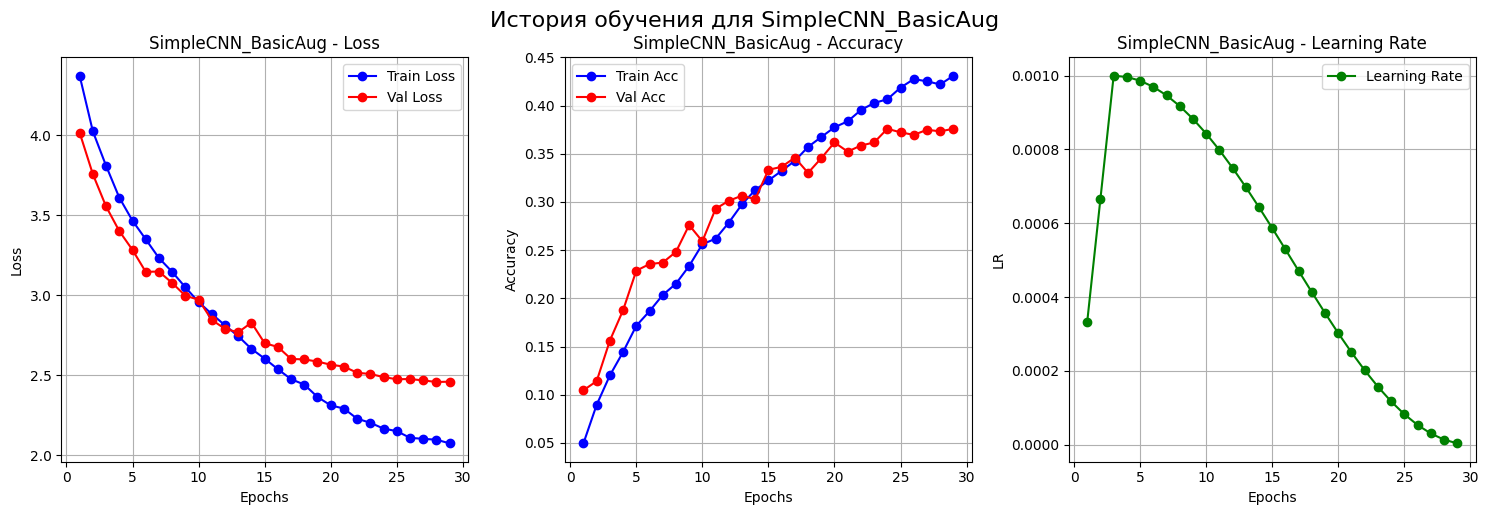

TTA: Проход 1/2...


TTA Pass 1:   0%|          | 0/30 [00:00<?, ?it/s]

TTA: Проход 2/2...


TTA Pass 2:   0%|          | 0/30 [00:00<?, ?it/s]


Точность на валидации с TTA (2 аугментаций): 0.3812


In [ ]:
results = {}
all_histories = {}


model_name_1 = "SimpleCNN_BasicAug"
train_loader_1, val_loader_1 = create_dataloaders(
    train_idx, val_idx, TRAIN_DIR, transforms_basic_train, transforms_basic_val,
    BATCH_SIZE, NUM_WORKERS
)
model_1 = SimpleCNN(num_classes=num_classes).to(DEVICE)
optimizer_1 = optim.AdamW(model_1.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion_1 = nn.CrossEntropyLoss()

scheduler_1 = lr_scheduler.CosineAnnealingLR(optimizer_1, T_max=EPOCHS - WARMUP_EPOCHS)

model_1, history_1, best_val_acc_1 = train_model(
    model_1, model_name_1, train_loader_1, val_loader_1, criterion_1, optimizer_1, scheduler_1, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)
results[model_name_1] = {'val_acc': best_val_acc_1}
all_histories[model_name_1] = history_1
plot_history(history_1, model_name_1)

results[model_name_1]['tta_val_acc'] = tta_validate(model_1, val_loader_1, DEVICE, n_augmentations=2)


--- Обучение модели: SimpleCNN_AdvancedAug ---


Epoch 1/30 (Train) LR=3.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 | Train Loss: 4.4261 Acc: 0.0456 | Val Loss: 4.0674 Acc: 0.0920 | LR: 3.3e-04
Validation accuracy улучшилась (0.0000 --> 0.0920). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 2/30 (Train) LR=6.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/30 | Train Loss: 4.1482 Acc: 0.0723 | Val Loss: 3.8020 Acc: 0.1362 | LR: 6.7e-04
Validation accuracy улучшилась (0.0920 --> 0.1362). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 3/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/30 | Train Loss: 3.9558 Acc: 0.0924 | Val Loss: 3.6026 Acc: 0.1562 | LR: 1.0e-03
Validation accuracy улучшилась (0.1362 --> 0.1562). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 4/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/30 | Train Loss: 3.8111 Acc: 0.1092 | Val Loss: 3.4617 Acc: 0.1693 | LR: 1.0e-03
Validation accuracy улучшилась (0.1562 --> 0.1693). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 5/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/30 | Train Loss: 3.6971 Acc: 0.1355 | Val Loss: 3.3489 Acc: 0.2029 | LR: 9.9e-04
Validation accuracy улучшилась (0.1693 --> 0.2029). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 6/30 (Train) LR=9.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/30 | Train Loss: 3.5940 Acc: 0.1462 | Val Loss: 3.2510 Acc: 0.2198 | LR: 9.7e-04
Validation accuracy улучшилась (0.2029 --> 0.2198). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 7/30 (Train) LR=9.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/30 | Train Loss: 3.4855 Acc: 0.1623 | Val Loss: 3.1669 Acc: 0.2266 | LR: 9.5e-04
Validation accuracy улучшилась (0.2198 --> 0.2266). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 8/30 (Train) LR=9.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/30 | Train Loss: 3.4154 Acc: 0.1753 | Val Loss: 3.1652 Acc: 0.2213 | LR: 9.2e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 9/30 (Train) LR=9.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/30 | Train Loss: 3.3565 Acc: 0.1885 | Val Loss: 3.0296 Acc: 0.2440 | LR: 8.8e-04
Validation accuracy улучшилась (0.2266 --> 0.2440). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 10/30 (Train) LR=8.8e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/30 | Train Loss: 3.3148 Acc: 0.1948 | Val Loss: 2.9968 Acc: 0.2571 | LR: 8.4e-04
Validation accuracy улучшилась (0.2440 --> 0.2571). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 11/30 (Train) LR=8.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/30 | Train Loss: 3.2124 Acc: 0.2104 | Val Loss: 2.9580 Acc: 0.2729 | LR: 8.0e-04
Validation accuracy улучшилась (0.2571 --> 0.2729). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 12/30 (Train) LR=8.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/30 | Train Loss: 3.1867 Acc: 0.2179 | Val Loss: 2.8473 Acc: 0.2923 | LR: 7.5e-04
Validation accuracy улучшилась (0.2729 --> 0.2923). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 13/30 (Train) LR=7.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/30 | Train Loss: 3.1341 Acc: 0.2187 | Val Loss: 2.8538 Acc: 0.2808 | LR: 7.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 14/30 (Train) LR=7.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/30 | Train Loss: 3.0861 Acc: 0.2270 | Val Loss: 2.8584 Acc: 0.2902 | LR: 6.4e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 15/30 (Train) LR=6.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/30 | Train Loss: 3.0221 Acc: 0.2404 | Val Loss: 2.7235 Acc: 0.3118 | LR: 5.9e-04
Validation accuracy улучшилась (0.2923 --> 0.3118). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 16/30 (Train) LR=5.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/30 | Train Loss: 2.9831 Acc: 0.2511 | Val Loss: 2.7293 Acc: 0.3170 | LR: 5.3e-04
Validation accuracy улучшилась (0.3118 --> 0.3170). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 17/30 (Train) LR=5.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/30 | Train Loss: 2.9274 Acc: 0.2534 | Val Loss: 2.6999 Acc: 0.3181 | LR: 4.7e-04
Validation accuracy улучшилась (0.3170 --> 0.3181). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 18/30 (Train) LR=4.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/30 | Train Loss: 2.8861 Acc: 0.2670 | Val Loss: 2.6687 Acc: 0.3297 | LR: 4.1e-04
Validation accuracy улучшилась (0.3181 --> 0.3297). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 19/30 (Train) LR=4.1e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/30 | Train Loss: 2.8598 Acc: 0.2663 | Val Loss: 2.6657 Acc: 0.3249 | LR: 3.6e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 20/30 (Train) LR=3.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/30 | Train Loss: 2.8210 Acc: 0.2836 | Val Loss: 2.6187 Acc: 0.3396 | LR: 3.0e-04
Validation accuracy улучшилась (0.3297 --> 0.3396). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 21/30 (Train) LR=3.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 21/30 | Train Loss: 2.7606 Acc: 0.2960 | Val Loss: 2.6096 Acc: 0.3407 | LR: 2.5e-04
Validation accuracy улучшилась (0.3396 --> 0.3407). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 22/30 (Train) LR=2.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 22/30 | Train Loss: 2.7288 Acc: 0.3059 | Val Loss: 2.5860 Acc: 0.3570 | LR: 2.0e-04
Validation accuracy улучшилась (0.3407 --> 0.3570). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 23/30 (Train) LR=2.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 23/30 | Train Loss: 2.7021 Acc: 0.3090 | Val Loss: 2.5537 Acc: 0.3549 | LR: 1.6e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 24/30 (Train) LR=1.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 24/30 | Train Loss: 2.6884 Acc: 0.3118 | Val Loss: 2.5477 Acc: 0.3580 | LR: 1.2e-04
Validation accuracy улучшилась (0.3570 --> 0.3580). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 25/30 (Train) LR=1.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 25/30 | Train Loss: 2.6775 Acc: 0.3076 | Val Loss: 2.5417 Acc: 0.3565 | LR: 8.2e-05
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 26/30 (Train) LR=8.2e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 26/30 | Train Loss: 2.6216 Acc: 0.3229 | Val Loss: 2.5351 Acc: 0.3554 | LR: 5.3e-05
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 27/30 (Train) LR=5.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 27/30 | Train Loss: 2.6158 Acc: 0.3194 | Val Loss: 2.5218 Acc: 0.3633 | LR: 3.0e-05
Validation accuracy улучшилась (0.3580 --> 0.3633). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 28/30 (Train) LR=3.0e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 28/30 | Train Loss: 2.6094 Acc: 0.3270 | Val Loss: 2.5188 Acc: 0.3628 | LR: 1.3e-05
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 29/30 (Train) LR=1.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 29/30 | Train Loss: 2.6155 Acc: 0.3223 | Val Loss: 2.5198 Acc: 0.3649 | LR: 3.4e-06
Validation accuracy улучшилась (0.3633 --> 0.3649). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth


Epoch 30/30 (Train) LR=3.4e-06:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 30/30 | Train Loss: 2.6119 Acc: 0.3254 | Val Loss: 2.5144 Acc: 0.3670 | LR: 0.0e+00
Validation accuracy улучшилась (0.3649 --> 0.3670). Сохранение модели...
Лучшая модель сохранена в: /content/output/SimpleCNN_AdvancedAug_best.pth
Загружена лучшая модель с Val Acc: 0.3670

Обучение SimpleCNN_AdvancedAug завершено за 2m 60s
Лучшая Val Acc для SimpleCNN_AdvancedAug: 0.366982


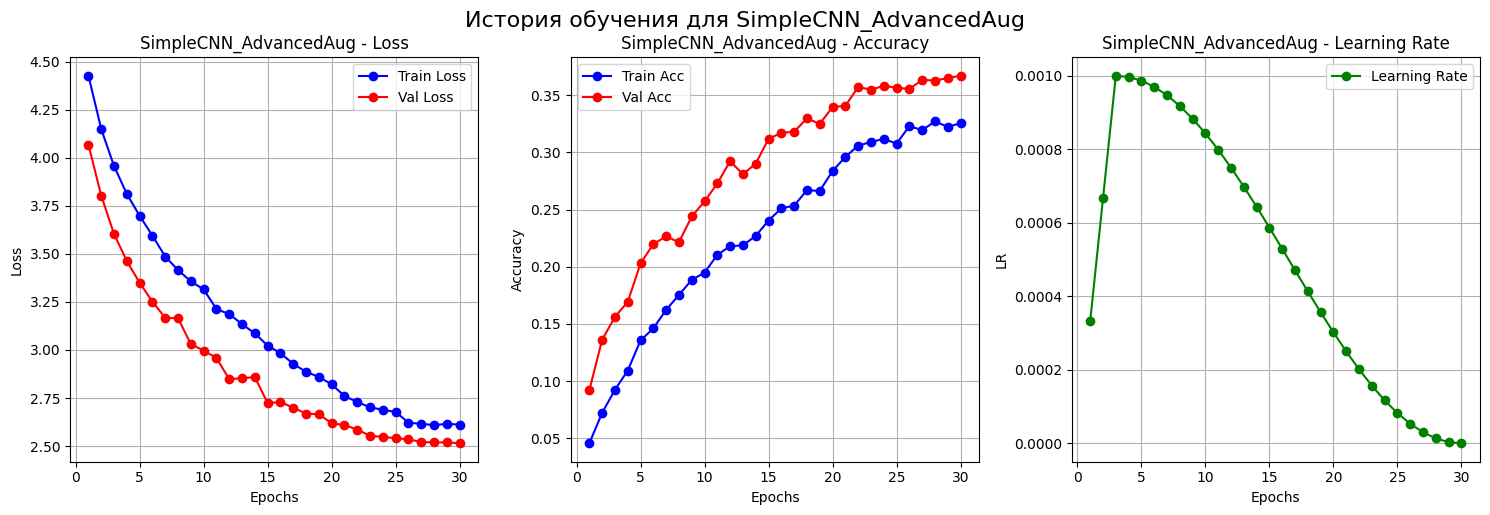

TTA: Проход 1/2...


TTA Pass 1:   0%|          | 0/30 [00:00<?, ?it/s]

TTA: Проход 2/2...


TTA Pass 2:   0%|          | 0/30 [00:00<?, ?it/s]


Точность на валидации с TTA (2 аугментаций): 0.3654


In [ ]:
model_name_2 = "SimpleCNN_AdvancedAug"
train_loader_2, val_loader_2 = create_dataloaders(
    train_idx, val_idx, TRAIN_DIR, transforms_advanced_train, transforms_basic_val, 
    BATCH_SIZE, NUM_WORKERS
)
model_2 = SimpleCNN(num_classes=num_classes).to(DEVICE)
optimizer_2 = optim.AdamW(model_2.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion_2 = nn.CrossEntropyLoss()
scheduler_2 = lr_scheduler.CosineAnnealingLR(optimizer_2, T_max=EPOCHS - WARMUP_EPOCHS)

model_2, history_2, best_val_acc_2 = train_model(
    model_2, model_name_2, train_loader_2, val_loader_2, criterion_2, optimizer_2, scheduler_2, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)
results[model_name_2] = {'val_acc': best_val_acc_2}
all_histories[model_name_2] = history_2
plot_history(history_2, model_name_2)

results[model_name_2]['tta_val_acc'] = tta_validate(model_2, val_loader_2, DEVICE, n_augmentations=2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 130MB/s]



--- Обучение модели: ResNet18_BasicAug_Resized ---


Epoch 1/30 (Train) LR=3.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 | Train Loss: 2.8625 Acc: 0.3254 | Val Loss: 2.1735 Acc: 0.4332 | LR: 3.3e-04
Validation accuracy улучшилась (0.0000 --> 0.4332). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 2/30 (Train) LR=6.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/30 | Train Loss: 1.9923 Acc: 0.4649 | Val Loss: 2.2045 Acc: 0.4264 | LR: 6.7e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 3/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/30 | Train Loss: 1.9069 Acc: 0.4799 | Val Loss: 2.1580 Acc: 0.4317 | LR: 1.0e-03
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 4/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/30 | Train Loss: 1.5904 Acc: 0.5593 | Val Loss: 2.1934 Acc: 0.4359 | LR: 1.0e-03
Validation accuracy улучшилась (0.4332 --> 0.4359). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 5/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/30 | Train Loss: 1.3049 Acc: 0.6253 | Val Loss: 2.0788 Acc: 0.4543 | LR: 9.9e-04
Validation accuracy улучшилась (0.4359 --> 0.4543). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 6/30 (Train) LR=9.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/30 | Train Loss: 1.1189 Acc: 0.6768 | Val Loss: 1.8982 Acc: 0.4958 | LR: 9.7e-04
Validation accuracy улучшилась (0.4543 --> 0.4958). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 7/30 (Train) LR=9.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/30 | Train Loss: 0.9233 Acc: 0.7248 | Val Loss: 1.9962 Acc: 0.4989 | LR: 9.5e-04
Validation accuracy улучшилась (0.4958 --> 0.4989). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 8/30 (Train) LR=9.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/30 | Train Loss: 0.7599 Acc: 0.7710 | Val Loss: 1.8781 Acc: 0.5242 | LR: 9.2e-04
Validation accuracy улучшилась (0.4989 --> 0.5242). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 9/30 (Train) LR=9.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/30 | Train Loss: 0.6359 Acc: 0.8086 | Val Loss: 1.7396 Acc: 0.5563 | LR: 8.8e-04
Validation accuracy улучшилась (0.5242 --> 0.5563). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 10/30 (Train) LR=8.8e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/30 | Train Loss: 0.4849 Acc: 0.8562 | Val Loss: 1.7246 Acc: 0.5694 | LR: 8.4e-04
Validation accuracy улучшилась (0.5563 --> 0.5694). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 11/30 (Train) LR=8.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/30 | Train Loss: 0.3922 Acc: 0.8808 | Val Loss: 1.6799 Acc: 0.5699 | LR: 8.0e-04
Validation accuracy улучшилась (0.5694 --> 0.5699). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 12/30 (Train) LR=8.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/30 | Train Loss: 0.2927 Acc: 0.9143 | Val Loss: 1.6975 Acc: 0.5915 | LR: 7.5e-04
Validation accuracy улучшилась (0.5699 --> 0.5915). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 13/30 (Train) LR=7.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/30 | Train Loss: 0.2208 Acc: 0.9366 | Val Loss: 1.7207 Acc: 0.5846 | LR: 7.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 14/30 (Train) LR=7.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/30 | Train Loss: 0.1427 Acc: 0.9639 | Val Loss: 1.6494 Acc: 0.6036 | LR: 6.4e-04
Validation accuracy улучшилась (0.5915 --> 0.6036). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 15/30 (Train) LR=6.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/30 | Train Loss: 0.1120 Acc: 0.9690 | Val Loss: 1.6104 Acc: 0.6162 | LR: 5.9e-04
Validation accuracy улучшилась (0.6036 --> 0.6162). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 16/30 (Train) LR=5.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/30 | Train Loss: 0.0880 Acc: 0.9770 | Val Loss: 1.5640 Acc: 0.6115 | LR: 5.3e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 17/30 (Train) LR=5.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/30 | Train Loss: 0.0548 Acc: 0.9888 | Val Loss: 1.5379 Acc: 0.6278 | LR: 4.7e-04
Validation accuracy улучшилась (0.6162 --> 0.6278). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 18/30 (Train) LR=4.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/30 | Train Loss: 0.0400 Acc: 0.9920 | Val Loss: 1.5044 Acc: 0.6299 | LR: 4.1e-04
Validation accuracy улучшилась (0.6278 --> 0.6299). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 19/30 (Train) LR=4.1e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/30 | Train Loss: 0.0243 Acc: 0.9965 | Val Loss: 1.4584 Acc: 0.6393 | LR: 3.6e-04
Validation accuracy улучшилась (0.6299 --> 0.6393). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 20/30 (Train) LR=3.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/30 | Train Loss: 0.0186 Acc: 0.9971 | Val Loss: 1.4782 Acc: 0.6330 | LR: 3.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 21/30 (Train) LR=3.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 21/30 | Train Loss: 0.0143 Acc: 0.9980 | Val Loss: 1.4661 Acc: 0.6362 | LR: 2.5e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 22/30 (Train) LR=2.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 22/30 | Train Loss: 0.0102 Acc: 0.9987 | Val Loss: 1.4525 Acc: 0.6414 | LR: 2.0e-04
Validation accuracy улучшилась (0.6393 --> 0.6414). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 23/30 (Train) LR=2.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 23/30 | Train Loss: 0.0085 Acc: 0.9993 | Val Loss: 1.4373 Acc: 0.6441 | LR: 1.6e-04
Validation accuracy улучшилась (0.6414 --> 0.6441). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 24/30 (Train) LR=1.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 24/30 | Train Loss: 0.0074 Acc: 0.9993 | Val Loss: 1.4372 Acc: 0.6462 | LR: 1.2e-04
Validation accuracy улучшилась (0.6441 --> 0.6462). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 25/30 (Train) LR=1.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 25/30 | Train Loss: 0.0061 Acc: 0.9997 | Val Loss: 1.4321 Acc: 0.6483 | LR: 8.2e-05
Validation accuracy улучшилась (0.6462 --> 0.6483). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 26/30 (Train) LR=8.2e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 26/30 | Train Loss: 0.0052 Acc: 0.9997 | Val Loss: 1.4305 Acc: 0.6525 | LR: 5.3e-05
Validation accuracy улучшилась (0.6483 --> 0.6525). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_BasicAug_Resized_best.pth


Epoch 27/30 (Train) LR=5.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 27/30 | Train Loss: 0.0047 Acc: 0.9999 | Val Loss: 1.4178 Acc: 0.6519 | LR: 3.0e-05
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 28/30 (Train) LR=3.0e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 28/30 | Train Loss: 0.0043 Acc: 0.9997 | Val Loss: 1.4322 Acc: 0.6467 | LR: 1.3e-05
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 29/30 (Train) LR=1.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 29/30 | Train Loss: 0.0041 Acc: 1.0000 | Val Loss: 1.4311 Acc: 0.6488 | LR: 3.4e-06
Validation accuracy не улучшилась. Счетчик: 3/5


Epoch 30/30 (Train) LR=3.4e-06:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 30/30 | Train Loss: 0.0047 Acc: 0.9997 | Val Loss: 1.4291 Acc: 0.6462 | LR: 0.0e+00
Validation accuracy не улучшилась. Счетчик: 4/5
Загружена лучшая модель с Val Acc: 0.6525

Обучение ResNet18_BasicAug_Resized завершено за 15m 25s
Лучшая Val Acc для ResNet18_BasicAug_Resized: 0.652471


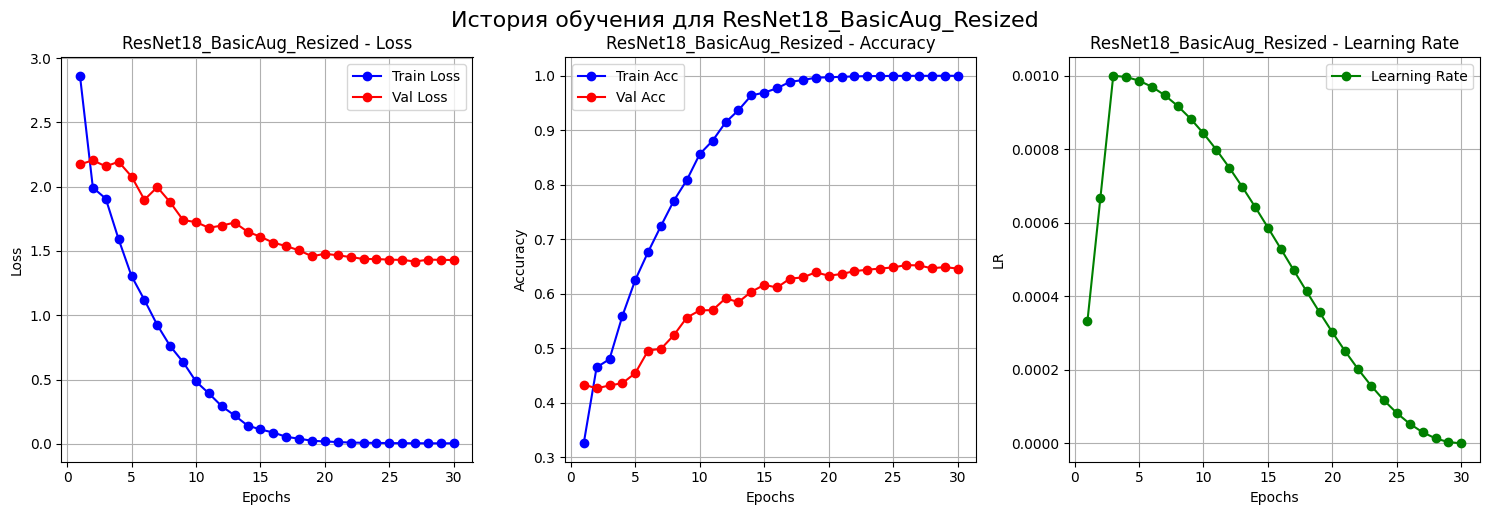

TTA: Проход 1/2...


TTA Pass 1:   0%|          | 0/30 [00:00<?, ?it/s]

TTA: Проход 2/2...


TTA Pass 2:   0%|          | 0/30 [00:00<?, ?it/s]


Точность на валидации с TTA (2 аугментаций): 0.6593


In [ ]:
model_name_3 = "ResNet18_BasicAug_Resized"
train_loader_3, val_loader_3 = create_dataloaders(
    train_idx, val_idx, TRAIN_DIR, transforms_transfer_basic_train, transforms_transfer_val,
    BATCH_SIZE, NUM_WORKERS
)
model_3 = get_transfer_model(num_classes=num_classes, pretrained=True).to(DEVICE)
optimizer_3 = optim.AdamW(model_3.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion_3 = nn.CrossEntropyLoss()
scheduler_3 = lr_scheduler.CosineAnnealingLR(optimizer_3, T_max=EPOCHS - WARMUP_EPOCHS)

model_3, history_3, best_val_acc_3 = train_model(
    model_3, model_name_3, train_loader_3, val_loader_3, criterion_3, optimizer_3, scheduler_3, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)
results[model_name_3] = {'val_acc': best_val_acc_3}
all_histories[model_name_3] = history_3
plot_history(history_3, model_name_3)

results[model_name_3]['tta_val_acc'] = tta_validate(model_3, val_loader_3, DEVICE, n_augmentations=2)


--- Обучение модели: ResNet18_AdvancedAug_Resized ---


Epoch 1/30 (Train) LR=3.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 | Train Loss: 2.9815 Acc: 0.3039 | Val Loss: 2.0099 Acc: 0.4779 | LR: 3.3e-04
Validation accuracy улучшилась (0.0000 --> 0.4779). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 2/30 (Train) LR=6.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/30 | Train Loss: 2.1356 Acc: 0.4405 | Val Loss: 2.0850 Acc: 0.4558 | LR: 6.7e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 3/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/30 | Train Loss: 2.0674 Acc: 0.4486 | Val Loss: 2.0720 Acc: 0.4448 | LR: 1.0e-03
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 4/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/30 | Train Loss: 1.8049 Acc: 0.5060 | Val Loss: 1.8810 Acc: 0.4974 | LR: 1.0e-03
Validation accuracy улучшилась (0.4779 --> 0.4974). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 5/30 (Train) LR=1.0e-03:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/30 | Train Loss: 1.5864 Acc: 0.5543 | Val Loss: 1.8186 Acc: 0.5168 | LR: 9.9e-04
Validation accuracy улучшилась (0.4974 --> 0.5168). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 6/30 (Train) LR=9.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/30 | Train Loss: 1.4165 Acc: 0.6004 | Val Loss: 1.8182 Acc: 0.5273 | LR: 9.7e-04
Validation accuracy улучшилась (0.5168 --> 0.5273). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 7/30 (Train) LR=9.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/30 | Train Loss: 1.2501 Acc: 0.6437 | Val Loss: 1.5997 Acc: 0.5741 | LR: 9.5e-04
Validation accuracy улучшилась (0.5273 --> 0.5741). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 8/30 (Train) LR=9.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/30 | Train Loss: 1.1470 Acc: 0.6684 | Val Loss: 1.8274 Acc: 0.5268 | LR: 9.2e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 9/30 (Train) LR=9.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/30 | Train Loss: 1.0520 Acc: 0.6970 | Val Loss: 1.5705 Acc: 0.5846 | LR: 8.8e-04
Validation accuracy улучшилась (0.5741 --> 0.5846). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 10/30 (Train) LR=8.8e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/30 | Train Loss: 0.8974 Acc: 0.7340 | Val Loss: 1.5926 Acc: 0.5946 | LR: 8.4e-04
Validation accuracy улучшилась (0.5846 --> 0.5946). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 11/30 (Train) LR=8.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/30 | Train Loss: 0.7709 Acc: 0.7701 | Val Loss: 1.6973 Acc: 0.5862 | LR: 8.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 12/30 (Train) LR=8.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/30 | Train Loss: 0.6956 Acc: 0.7951 | Val Loss: 1.5618 Acc: 0.5999 | LR: 7.5e-04
Validation accuracy улучшилась (0.5946 --> 0.5999). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 13/30 (Train) LR=7.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/30 | Train Loss: 0.5966 Acc: 0.8232 | Val Loss: 1.4909 Acc: 0.6130 | LR: 7.0e-04
Validation accuracy улучшилась (0.5999 --> 0.6130). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 14/30 (Train) LR=7.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/30 | Train Loss: 0.5416 Acc: 0.8394 | Val Loss: 1.5837 Acc: 0.6188 | LR: 6.4e-04
Validation accuracy улучшилась (0.6130 --> 0.6188). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 15/30 (Train) LR=6.4e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/30 | Train Loss: 0.4484 Acc: 0.8690 | Val Loss: 1.4469 Acc: 0.6267 | LR: 5.9e-04
Validation accuracy улучшилась (0.6188 --> 0.6267). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 16/30 (Train) LR=5.9e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/30 | Train Loss: 0.3718 Acc: 0.8909 | Val Loss: 1.4167 Acc: 0.6372 | LR: 5.3e-04
Validation accuracy улучшилась (0.6267 --> 0.6372). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 17/30 (Train) LR=5.3e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/30 | Train Loss: 0.3216 Acc: 0.9035 | Val Loss: 1.4222 Acc: 0.6504 | LR: 4.7e-04
Validation accuracy улучшилась (0.6372 --> 0.6504). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 18/30 (Train) LR=4.7e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/30 | Train Loss: 0.2796 Acc: 0.9244 | Val Loss: 1.4182 Acc: 0.6472 | LR: 4.1e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 19/30 (Train) LR=4.1e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/30 | Train Loss: 0.2407 Acc: 0.9324 | Val Loss: 1.3696 Acc: 0.6540 | LR: 3.6e-04
Validation accuracy улучшилась (0.6504 --> 0.6540). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 20/30 (Train) LR=3.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/30 | Train Loss: 0.1855 Acc: 0.9495 | Val Loss: 1.3887 Acc: 0.6593 | LR: 3.0e-04
Validation accuracy улучшилась (0.6540 --> 0.6593). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 21/30 (Train) LR=3.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 21/30 | Train Loss: 0.1642 Acc: 0.9575 | Val Loss: 1.3236 Acc: 0.6714 | LR: 2.5e-04
Validation accuracy улучшилась (0.6593 --> 0.6714). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 22/30 (Train) LR=2.5e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 22/30 | Train Loss: 0.1544 Acc: 0.9575 | Val Loss: 1.3484 Acc: 0.6609 | LR: 2.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 23/30 (Train) LR=2.0e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 23/30 | Train Loss: 0.1140 Acc: 0.9716 | Val Loss: 1.3167 Acc: 0.6767 | LR: 1.6e-04
Validation accuracy улучшилась (0.6714 --> 0.6767). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 24/30 (Train) LR=1.6e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 24/30 | Train Loss: 0.0991 Acc: 0.9766 | Val Loss: 1.3275 Acc: 0.6746 | LR: 1.2e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 25/30 (Train) LR=1.2e-04:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 25/30 | Train Loss: 0.0898 Acc: 0.9783 | Val Loss: 1.2944 Acc: 0.6824 | LR: 8.2e-05
Validation accuracy улучшилась (0.6767 --> 0.6824). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 26/30 (Train) LR=8.2e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 26/30 | Train Loss: 0.0847 Acc: 0.9802 | Val Loss: 1.2908 Acc: 0.6840 | LR: 5.3e-05
Validation accuracy улучшилась (0.6824 --> 0.6840). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 27/30 (Train) LR=5.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 27/30 | Train Loss: 0.0780 Acc: 0.9820 | Val Loss: 1.2792 Acc: 0.6840 | LR: 3.0e-05
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 28/30 (Train) LR=3.0e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 28/30 | Train Loss: 0.0799 Acc: 0.9803 | Val Loss: 1.2735 Acc: 0.6819 | LR: 1.3e-05
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 29/30 (Train) LR=1.3e-05:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 29/30 | Train Loss: 0.0647 Acc: 0.9870 | Val Loss: 1.2716 Acc: 0.6856 | LR: 3.4e-06
Validation accuracy улучшилась (0.6840 --> 0.6856). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_best.pth


Epoch 30/30 (Train) LR=3.4e-06:   0%|          | 0/119 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 30/30 | Train Loss: 0.0666 Acc: 0.9869 | Val Loss: 1.2707 Acc: 0.6788 | LR: 0.0e+00
Validation accuracy не улучшилась. Счетчик: 1/5
Загружена лучшая модель с Val Acc: 0.6856

Обучение ResNet18_AdvancedAug_Resized завершено за 15m 32s
Лучшая Val Acc для ResNet18_AdvancedAug_Resized: 0.685594


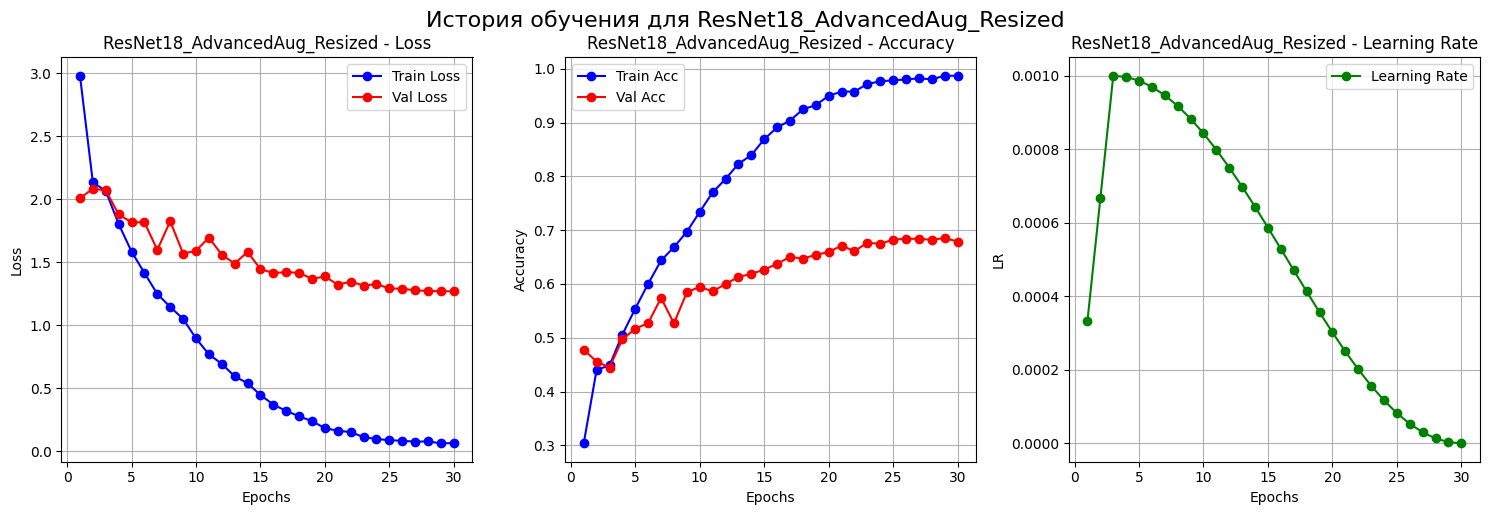

TTA: Проход 1/2...


TTA Pass 1:   0%|          | 0/30 [00:00<?, ?it/s]

TTA: Проход 2/2...


TTA Pass 2:   0%|          | 0/30 [00:00<?, ?it/s]


Точность на валидации с TTA (2 аугментаций): 0.6887


In [ ]:
model_name_4 = "ResNet18_AdvancedAug_Resized"
train_loader_4, val_loader_4 = create_dataloaders(
    train_idx, val_idx, TRAIN_DIR, transforms_transfer_advanced_train, transforms_transfer_val,
    BATCH_SIZE, NUM_WORKERS
)
model_4 = get_transfer_model(num_classes=num_classes, pretrained=True).to(DEVICE)
optimizer_4 = optim.AdamW(model_4.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion_4 = nn.CrossEntropyLoss()
scheduler_4 = lr_scheduler.CosineAnnealingLR(optimizer_4, T_max=EPOCHS - WARMUP_EPOCHS)

model_4, history_4, best_val_acc_4 = train_model(
    model_4, model_name_4, train_loader_4, val_loader_4, criterion_4, optimizer_4, scheduler_4, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)
results[model_name_4] = {'val_acc': best_val_acc_4}
all_histories[model_name_4] = history_4
plot_history(history_4, model_name_4)

results[model_name_4]['tta_val_acc'] = tta_validate(model_4, val_loader_4, DEVICE, n_augmentations=2)

In [ ]:
print("\n\n--- Итоговые результаты (Лучшая точность на валидации) ---")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='tta_val_acc', ascending=False) 
print(results_df)



--- Итоговые результаты (Лучшая точность на валидации) ---
                               val_acc  tta_val_acc
ResNet18_AdvancedAug_Resized  0.685594     0.688749
ResNet18_BasicAug_Resized     0.652471     0.659306
SimpleCNN_BasicAug            0.375920     0.381178
SimpleCNN_AdvancedAug         0.366982     0.365405


In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset, ConcatDataset
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from tqdm.notebook import tqdm
import random





LATENT_DIM = 100       
EMBEDDING_DIM = 10     
GAN_EPOCHS = 50        
GAN_LR = 2e-4          
GAN_BATCH_SIZE = 128   
IMG_SIZE_GAN = 32      
NUM_CLASSES_GAN = 100  
BETA1 = 0.5            
BETA2 = 0.999          
SAVE_IMG_INTERVAL = 5  


GAN_OUTPUT_DIR = os.path.join(OUTPUT_DIR, 'gan_generated')
GAN_SAMPLE_DIR = os.path.join(GAN_OUTPUT_DIR, 'samples')
GAN_MODEL_DIR = os.path.join(OUTPUT_DIR, 'gan_models')
os.makedirs(GAN_SAMPLE_DIR, exist_ok=True)
os.makedirs(GAN_MODEL_DIR, exist_ok=True)
print(f"Директория для сгенерированных изображений: {GAN_OUTPUT_DIR}")
print(f"Директория для примеров генерации: {GAN_SAMPLE_DIR}")
print(f"Директория для моделей GAN: {GAN_MODEL_DIR}")





class ImageFolderAlbumentations(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        self.image_folder = datasets.ImageFolder(root=root, target_transform=target_transform)
        self.transform = transform
        self.classes = self.image_folder.classes
        self.class_to_idx = self.image_folder.class_to_idx
        self.samples = self.image_folder.samples
        self.targets = self.image_folder.targets

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        image_np = np.array(image)

        if self.transform:
            augmented = self.transform(image=image_np)
            image_tensor = augmented['image']
        else:
            image_tensor = ToTensorV2()(image=image_np)['image']

        return image_tensor, target


gan_transform = A.Compose([
    
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]), 
    ToTensorV2(),
])


gan_train_dataset = Subset(
    ImageFolderAlbumentations(root=TRAIN_DIR, transform=gan_transform),
    train_idx 
)

gan_train_loader = DataLoader(
    gan_train_dataset,
    batch_size=GAN_BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"Создан DataLoader для обучения GAN с {len(gan_train_dataset)} изображениями.")

Директория для сгенерированных изображений: /content/output/gan_generated
Директория для примеров генерации: /content/output/gan_generated/samples
Директория для моделей GAN: /content/output/gan_models
Создан DataLoader для обучения GAN с 7608 изображениями.


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, embedding_dim, num_classes, img_channels=3, img_size=32):
        super(Generator, self).__init__()
        self.img_size = img_size
        self.num_classes = num_classes
        self.embedding_dim = embedding_dim
        self.label_embedding = nn.Embedding(num_classes, embedding_dim)

        
        input_dim = latent_dim + embedding_dim

        self.init_size = img_size // 4 
        self.l1 = nn.Sequential(nn.Linear(input_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2), 
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2), 
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, img_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh() 
        )

    def forward(self, noise, labels):
        
        label_emb = self.label_embedding(labels)
        gen_input = torch.cat((label_emb, noise), -1)
        out = self.l1(gen_input)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


class Discriminator(nn.Module):
    def __init__(self, embedding_dim, num_classes, img_channels=3, img_size=32):
        super(Discriminator, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_classes = num_classes
        self.img_size = img_size
        self.label_embedding = nn.Embedding(num_classes, embedding_dim)

        final_conv_size = img_size // (2 ** 4) 
        self.adv_layer_input_dim = 128 * final_conv_size ** 2 

        
        self.label_linear = nn.Linear(embedding_dim, self.adv_layer_input_dim)

        def discriminator_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, kernel_size=3, stride=2, padding=1),
                     nn.LeakyReLU(0.2, inplace=True),
                     nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.conv_blocks = nn.Sequential(
            *discriminator_block(img_channels, 16, bn=False), 
            *discriminator_block(16, 32),                    
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
            
        )
        self.adversarial_layer = nn.Sequential(
            nn.Linear(self.adv_layer_input_dim, 1) 
        )


    def forward(self, img, labels):
        
        img_features = self.conv_blocks(img)
        img_features = img_features.view(img_features.size(0), -1) 
        validity = self.adversarial_layer(img_features) 

        return validity

In [ ]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

generator = Generator(LATENT_DIM, EMBEDDING_DIM, NUM_CLASSES_GAN, img_size=IMG_SIZE_GAN).to(DEVICE)
discriminator = Discriminator(EMBEDDING_DIM, NUM_CLASSES_GAN, img_size=IMG_SIZE_GAN).to(DEVICE)

generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

adversarial_loss = nn.BCEWithLogitsLoss()

optimizer_G = optim.Adam(generator.parameters(), lr=GAN_LR, betas=(BETA1, BETA2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=GAN_LR, betas=(BETA1, BETA2))

print("Модели GAN, оптимизаторы и функция потерь инициализированы.")

Модели GAN, оптимизаторы и функция потерь инициализированы.



--- Начало обучения GAN на 50 эпох ---


GAN Epoch 1/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 1/50 | D Loss: 0.6932 | G Loss: 0.6932 | Time: 3.38s


GAN Epoch 2/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 2/50 | D Loss: 0.6910 | G Loss: 0.6926 | Time: 3.19s


GAN Epoch 3/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 3/50 | D Loss: 0.6932 | G Loss: 0.7006 | Time: 2.80s


GAN Epoch 4/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 4/50 | D Loss: 0.6913 | G Loss: 0.6927 | Time: 2.87s


GAN Epoch 5/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 5/50 | D Loss: 0.6936 | G Loss: 0.6957 | Time: 3.10s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 6/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 6/50 | D Loss: 0.6919 | G Loss: 0.6934 | Time: 3.50s


GAN Epoch 7/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 7/50 | D Loss: 0.6904 | G Loss: 0.7009 | Time: 2.79s


GAN Epoch 8/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 8/50 | D Loss: 0.6946 | G Loss: 0.7050 | Time: 2.82s


GAN Epoch 9/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 9/50 | D Loss: 0.6921 | G Loss: 0.6973 | Time: 2.87s


GAN Epoch 10/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 10/50 | D Loss: 0.6924 | G Loss: 0.6927 | Time: 3.68s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 11/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 11/50 | D Loss: 0.6925 | G Loss: 0.6956 | Time: 2.78s


GAN Epoch 12/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 12/50 | D Loss: 0.6898 | G Loss: 0.6941 | Time: 2.80s


GAN Epoch 13/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 13/50 | D Loss: 0.6927 | G Loss: 0.6851 | Time: 2.85s


GAN Epoch 14/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 14/50 | D Loss: 0.6951 | G Loss: 0.6995 | Time: 3.83s


GAN Epoch 15/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 15/50 | D Loss: 0.6927 | G Loss: 0.7015 | Time: 2.81s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 16/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 16/50 | D Loss: 0.6913 | G Loss: 0.6939 | Time: 2.83s


GAN Epoch 17/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 17/50 | D Loss: 0.6923 | G Loss: 0.6938 | Time: 2.88s


GAN Epoch 18/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 18/50 | D Loss: 0.6928 | G Loss: 0.6974 | Time: 3.61s


GAN Epoch 19/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 19/50 | D Loss: 0.6890 | G Loss: 0.7061 | Time: 2.92s


GAN Epoch 20/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 20/50 | D Loss: 0.6925 | G Loss: 0.6845 | Time: 2.81s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 21/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 21/50 | D Loss: 0.6937 | G Loss: 0.6978 | Time: 2.89s


GAN Epoch 22/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 22/50 | D Loss: 0.6887 | G Loss: 0.6908 | Time: 3.43s


GAN Epoch 23/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 23/50 | D Loss: 0.6943 | G Loss: 0.6921 | Time: 3.06s


GAN Epoch 24/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 24/50 | D Loss: 0.6946 | G Loss: 0.6957 | Time: 2.90s


GAN Epoch 25/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 25/50 | D Loss: 0.6937 | G Loss: 0.6967 | Time: 2.83s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 26/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 26/50 | D Loss: 0.6928 | G Loss: 0.6951 | Time: 3.24s


GAN Epoch 27/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 27/50 | D Loss: 0.6928 | G Loss: 0.6943 | Time: 3.24s


GAN Epoch 28/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 28/50 | D Loss: 0.6932 | G Loss: 0.6883 | Time: 2.87s


GAN Epoch 29/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 29/50 | D Loss: 0.6942 | G Loss: 0.6960 | Time: 2.88s


GAN Epoch 30/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 30/50 | D Loss: 0.6931 | G Loss: 0.6948 | Time: 2.94s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 31/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 31/50 | D Loss: 0.6922 | G Loss: 0.6935 | Time: 3.54s


GAN Epoch 32/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 32/50 | D Loss: 0.6923 | G Loss: 0.6905 | Time: 2.81s


GAN Epoch 33/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 33/50 | D Loss: 0.6911 | G Loss: 0.6913 | Time: 2.84s


GAN Epoch 34/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 34/50 | D Loss: 0.6955 | G Loss: 0.6939 | Time: 2.91s


GAN Epoch 35/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 35/50 | D Loss: 0.6926 | G Loss: 0.6988 | Time: 3.73s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 36/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 36/50 | D Loss: 0.6920 | G Loss: 0.6924 | Time: 2.88s


GAN Epoch 37/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 37/50 | D Loss: 0.6940 | G Loss: 0.6920 | Time: 2.86s


GAN Epoch 38/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 38/50 | D Loss: 0.6929 | G Loss: 0.6927 | Time: 2.82s


GAN Epoch 39/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 39/50 | D Loss: 0.6915 | G Loss: 0.6988 | Time: 3.71s


GAN Epoch 40/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 40/50 | D Loss: 0.6925 | G Loss: 0.6888 | Time: 2.81s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 41/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 41/50 | D Loss: 0.6907 | G Loss: 0.6967 | Time: 2.83s


GAN Epoch 42/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 42/50 | D Loss: 0.6929 | G Loss: 0.6953 | Time: 2.83s


GAN Epoch 43/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 43/50 | D Loss: 0.6928 | G Loss: 0.6961 | Time: 3.66s


GAN Epoch 44/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 44/50 | D Loss: 0.6875 | G Loss: 0.6953 | Time: 3.01s


GAN Epoch 45/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 45/50 | D Loss: 0.6814 | G Loss: 0.7003 | Time: 2.87s
Сохранены примеры генерации в /content/output/gan_generated/samples


GAN Epoch 46/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 46/50 | D Loss: 0.6854 | G Loss: 0.7039 | Time: 2.91s


GAN Epoch 47/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 47/50 | D Loss: 0.6957 | G Loss: 0.6970 | Time: 3.56s


GAN Epoch 48/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 48/50 | D Loss: 0.6942 | G Loss: 0.7024 | Time: 3.06s


GAN Epoch 49/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 49/50 | D Loss: 0.6944 | G Loss: 0.6960 | Time: 2.82s


GAN Epoch 50/50:   0%|          | 0/60 [00:00<?, ?it/s]

GAN Epoch 50/50 | D Loss: 0.6911 | G Loss: 0.7005 | Time: 2.80s
Сохранены примеры генерации в /content/output/gan_generated/samples
Модели GAN сохранены в /content/output/gan_models

Обучение GAN завершено за 2m 33s


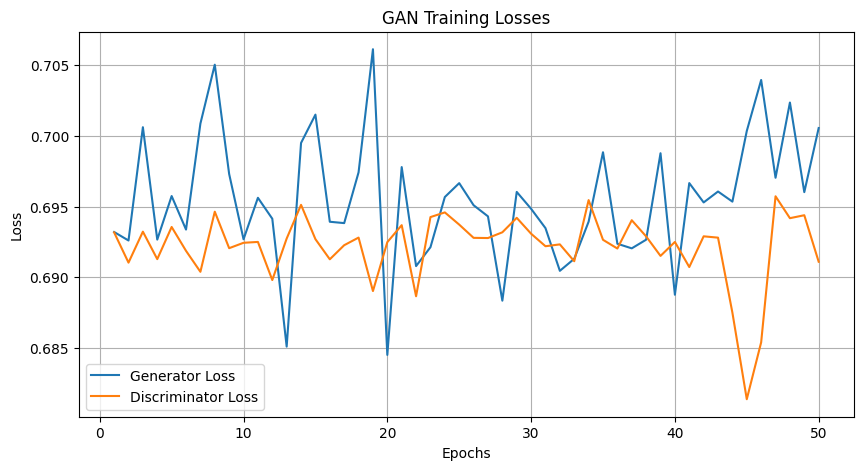

In [ ]:
print(f"\n--- Начало обучения GAN на {GAN_EPOCHS} эпох ---")
start_time_gan = time.time()

fixed_noise = torch.randn(NUM_CLASSES_GAN, LATENT_DIM, device=DEVICE) 
fixed_labels = torch.arange(NUM_CLASSES_GAN, dtype=torch.long, device=DEVICE)

g_losses = []
d_losses = []

for epoch in range(GAN_EPOCHS):
    epoch_start_time = time.time()
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0
    num_batches = 0

    generator.train()
    discriminator.train()

    progress_bar = tqdm(gan_train_loader, desc=f"GAN Epoch {epoch+1}/{GAN_EPOCHS}", leave=False)

    for i, (real_imgs, labels) in enumerate(progress_bar):

        
        real_imgs = real_imgs.to(DEVICE)
        labels = labels.to(DEVICE)
        current_batch_size = real_imgs.size(0)

        
        valid = torch.ones(current_batch_size, 1, device=DEVICE, dtype=torch.float)
        fake = torch.zeros(current_batch_size, 1, device=DEVICE, dtype=torch.float)

        optimizer_G.zero_grad()

        z = torch.randn(current_batch_size, LATENT_DIM, device=DEVICE)
        
        gen_labels = labels 
        
        gen_imgs = generator(z, gen_labels)

        validity_fake_g = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity_fake_g, valid) 

        g_loss.backward()
        optimizer_G.step()

        optimizer_D.zero_grad()

        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid) 

        validity_fake_d = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake_d, fake) 

        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        num_batches += 1

        progress_bar.set_postfix(D_loss=f"{d_loss.item():.4f}", G_loss=f"{g_loss.item():.4f}")

    avg_g_loss = epoch_g_loss / num_batches
    avg_d_loss = epoch_d_loss / num_batches
    g_losses.append(avg_g_loss)
    d_losses.append(avg_d_loss)
    epoch_time = time.time() - epoch_start_time

    print(f"GAN Epoch {epoch+1}/{GAN_EPOCHS} | D Loss: {avg_d_loss:.4f} | G Loss: {avg_g_loss:.4f} | Time: {epoch_time:.2f}s")

    if (epoch + 1) % SAVE_IMG_INTERVAL == 0 or epoch == GAN_EPOCHS - 1:
        generator.eval()
        with torch.no_grad():
            gen_samples = generator(fixed_noise, fixed_labels)
            gen_samples = (gen_samples * 0.5) + 0.5
            save_image(gen_samples.data,
                       os.path.join(GAN_SAMPLE_DIR, f"epoch_{epoch+1:03d}.png"),
                       nrow=10, 
                       normalize=False) 
            print(f"Сохранены примеры генерации в {GAN_SAMPLE_DIR}")
        generator.train() 


torch.save(generator.state_dict(), os.path.join(GAN_MODEL_DIR, 'generator.pth'))
torch.save(discriminator.state_dict(), os.path.join(GAN_MODEL_DIR, 'discriminator.pth'))
print(f"Модели GAN сохранены в {GAN_MODEL_DIR}")

total_gan_time = time.time() - start_time_gan
print(f"\nОбучение GAN завершено за {total_gan_time // 60:.0f}m {total_gan_time % 60:.0f}s")

plt.figure(figsize=(10, 5))
plt.plot(range(1, GAN_EPOCHS + 1), g_losses, label='Generator Loss')
plt.plot(range(1, GAN_EPOCHS + 1), d_losses, label='Discriminator Loss')
plt.title('GAN Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Генерация дополнительных данных с помощью обученного GAN ---")

generator.load_state_dict(torch.load(os.path.join(GAN_MODEL_DIR, 'generator.pth'), map_location=DEVICE))
generator.eval()

if 'full_dataset_no_transform' not in locals():
    print("Пересоздание full_dataset_no_transform для получения имен классов...")
    full_dataset_no_transform = ImageFolderAlbumentations(root=TRAIN_DIR)
class_names_gan = full_dataset_no_transform.classes
class_to_idx_gan = full_dataset_no_transform.class_to_idx
idx_to_class_gan = {v: k for k, v in class_to_idx_gan.items()}


if 'image_counts' not in locals():
     
     print("Пересчет image_counts...")
     image_counts = {}
     original_samples = datasets.ImageFolder(root=TRAIN_DIR).samples
     targets_original = [s[1] for s in original_samples] 
     
     train_targets = [targets_original[i] for i in train_idx]
     for i in range(NUM_CLASSES_GAN):
         image_counts[class_names_gan[i]] = train_targets.count(i)

max_count = max(image_counts.values())
print(f"Максимальное количество изображений в классе (на трейне): {max_count}")
num_to_generate_per_class = {name: max(0, max_count - count) for name, count in image_counts.items()}
total_generated = sum(num_to_generate_per_class.values())
print(f"Планируется сгенерировать {total_generated} изображений для выравнивания классов.")

generated_samples = [] 


GENERATED_IMG_SAVE_DIR = os.path.join(GAN_OUTPUT_DIR, 'generated_images_by_class')
os.makedirs(GENERATED_IMG_SAVE_DIR, exist_ok=True)

transform_to_pil = transforms.Compose([
    transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]), 
    transforms.ToPILImage()
])

generation_batch_size = 256 

with torch.no_grad():
    for class_name, num_to_gen in tqdm(num_to_generate_per_class.items(), desc="Генерация по классам"):
        if num_to_gen == 0:
            continue

        class_idx = class_to_idx_gan[class_name]
        class_label_tensor = torch.full((generation_batch_size,), class_idx, dtype=torch.long, device=DEVICE)
        class_save_dir = os.path.join(GENERATED_IMG_SAVE_DIR, class_name)
        os.makedirs(class_save_dir, exist_ok=True)

        generated_count = 0
        while generated_count < num_to_gen:
            current_batch_size = min(generation_batch_size, num_to_gen - generated_count)
            if current_batch_size != generation_batch_size:
                 class_label_tensor = torch.full((current_batch_size,), class_idx, dtype=torch.long, device=DEVICE)

            z = torch.randn(current_batch_size, LATENT_DIM, device=DEVICE)
            fake_imgs_batch = generator(z, class_label_tensor)

            
            for i in range(current_batch_size):
                img_tensor = fake_imgs_batch[i].cpu()
                pil_img = transform_to_pil(img_tensor)
                img_filename = f"gan_gen_{class_name}_{generated_count + i:04d}.png"
                img_path = os.path.join(class_save_dir, img_filename)
                pil_img.save(img_path)
                generated_samples.append((img_path, class_idx))

            generated_count += current_batch_size

print(f"Сгенерировано и сохранено {len(generated_samples)} изображений в {GENERATED_IMG_SAVE_DIR}")


--- Генерация дополнительных данных с помощью обученного GAN ---
Максимальное количество изображений в классе (на трейне): 150
Планируется сгенерировать 5490 изображений для выравнивания классов.


Генерация по классам:   0%|          | 0/100 [00:00<?, ?it/s]

Сгенерировано и сохранено 5490 изображений в /content/output/gan_generated/generated_images_by_class


In [ ]:
print("\n--- Создание комбинированного датасета (Original Train + GAN Generated) ---")

original_train_dataset_subset = Subset(
    ImageFolderAlbumentations(root=TRAIN_DIR, transform=transforms_transfer_advanced_train), 
    train_idx
)

class GeneratedDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples 
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        
        image = Image.open(img_path).convert('RGB')
        image_np = np.array(image)

        if self.transform:
            augmented = self.transform(image=image_np)
            image_tensor = augmented['image']
        else:
            
            
             raise ValueError("Transform is required for GeneratedDataset to match classifier input")

        return image_tensor, target

generated_dataset = GeneratedDataset(generated_samples, transform=transforms_transfer_advanced_train) 
combined_train_dataset = ConcatDataset([original_train_dataset_subset, generated_dataset])

print(f"Размер оригинального трейн-датасета (subset): {len(original_train_dataset_subset)}")
print(f"Размер сгенерированного датасета: {len(generated_dataset)}")
print(f"Размер комбинированного трейн-датасета: {len(combined_train_dataset)}")


val_dataset_final = Subset(
    ImageFolderAlbumentations(root=TRAIN_DIR, transform=transforms_transfer_val), 
    val_idx
)
print(f"Размер валидационного датасета (не изменен): {len(val_dataset_final)}")


combined_train_loader = DataLoader(
    combined_train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, 
    num_workers=NUM_WORKERS,
    pin_memory=True
)

val_loader_final = DataLoader(
    val_dataset_final,
    batch_size=BATCH_SIZE,
    shuffle=False, 
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print("Созданы новые DataLoaders для комбинированного обучения.")


--- Создание комбинированного датасета (Original Train + GAN Generated) ---
Размер оригинального трейн-датасета (subset): 7608
Размер сгенерированного датасета: 5490
Размер комбинированного трейн-датасета: 13098
Размер валидационного датасета (не изменен): 1902
Созданы новые DataLoaders для комбинированного обучения.



--- Переобучение лучшей модели (ResNet18_AdvancedAug_Resized) на данных с GAN-аугментацией ---

--- Обучение модели: ResNet18_AdvancedAug_Resized_GAN ---


Epoch 1/30 (Train) LR=3.3e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 | Train Loss: 3.6095 Acc: 0.1778 | Val Loss: 2.3044 Acc: 0.4069 | LR: 3.3e-04
Validation accuracy улучшилась (0.0000 --> 0.4069). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 2/30 (Train) LR=6.7e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/30 | Train Loss: 3.1407 Acc: 0.2368 | Val Loss: 2.2236 Acc: 0.4196 | LR: 6.7e-04
Validation accuracy улучшилась (0.4069 --> 0.4196). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 3/30 (Train) LR=1.0e-03:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/30 | Train Loss: 3.0515 Acc: 0.2469 | Val Loss: 2.3596 Acc: 0.4064 | LR: 1.0e-03
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 4/30 (Train) LR=1.0e-03:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/30 | Train Loss: 2.8117 Acc: 0.2906 | Val Loss: 2.0552 Acc: 0.4648 | LR: 1.0e-03
Validation accuracy улучшилась (0.4196 --> 0.4648). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 5/30 (Train) LR=1.0e-03:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/30 | Train Loss: 2.6148 Acc: 0.3275 | Val Loss: 2.0538 Acc: 0.4606 | LR: 9.9e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 6/30 (Train) LR=9.9e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/30 | Train Loss: 2.4477 Acc: 0.3630 | Val Loss: 1.9903 Acc: 0.4958 | LR: 9.7e-04
Validation accuracy улучшилась (0.4648 --> 0.4958). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 7/30 (Train) LR=9.7e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/30 | Train Loss: 2.3387 Acc: 0.3846 | Val Loss: 1.9105 Acc: 0.5074 | LR: 9.5e-04
Validation accuracy улучшилась (0.4958 --> 0.5074). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 8/30 (Train) LR=9.5e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/30 | Train Loss: 2.2115 Acc: 0.4087 | Val Loss: 1.7671 Acc: 0.5526 | LR: 9.2e-04
Validation accuracy улучшилась (0.5074 --> 0.5526). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 9/30 (Train) LR=9.2e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/30 | Train Loss: 2.0713 Acc: 0.4394 | Val Loss: 1.7663 Acc: 0.5447 | LR: 8.8e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 10/30 (Train) LR=8.8e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/30 | Train Loss: 1.9523 Acc: 0.4725 | Val Loss: 2.0842 Acc: 0.5315 | LR: 8.4e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 11/30 (Train) LR=8.4e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/30 | Train Loss: 1.8687 Acc: 0.4875 | Val Loss: 1.8014 Acc: 0.5620 | LR: 8.0e-04
Validation accuracy улучшилась (0.5526 --> 0.5620). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 12/30 (Train) LR=8.0e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/30 | Train Loss: 1.7223 Acc: 0.5260 | Val Loss: 1.6225 Acc: 0.5831 | LR: 7.5e-04
Validation accuracy улучшилась (0.5620 --> 0.5831). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 13/30 (Train) LR=7.5e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/30 | Train Loss: 1.5944 Acc: 0.5608 | Val Loss: 1.6021 Acc: 0.5999 | LR: 7.0e-04
Validation accuracy улучшилась (0.5831 --> 0.5999). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 14/30 (Train) LR=7.0e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/30 | Train Loss: 1.5101 Acc: 0.5776 | Val Loss: 1.5402 Acc: 0.6078 | LR: 6.4e-04
Validation accuracy улучшилась (0.5999 --> 0.6078). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 15/30 (Train) LR=6.4e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/30 | Train Loss: 1.3954 Acc: 0.6164 | Val Loss: 1.6036 Acc: 0.5973 | LR: 5.9e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 16/30 (Train) LR=5.9e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/30 | Train Loss: 1.2796 Acc: 0.6470 | Val Loss: 1.5989 Acc: 0.6057 | LR: 5.3e-04
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 17/30 (Train) LR=5.3e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/30 | Train Loss: 1.1779 Acc: 0.6732 | Val Loss: 1.5923 Acc: 0.6057 | LR: 4.7e-04
Validation accuracy не улучшилась. Счетчик: 3/5


Epoch 18/30 (Train) LR=4.7e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/30 | Train Loss: 1.0723 Acc: 0.7006 | Val Loss: 1.5242 Acc: 0.6183 | LR: 4.1e-04
Validation accuracy улучшилась (0.6078 --> 0.6183). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 19/30 (Train) LR=4.1e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/30 | Train Loss: 0.9711 Acc: 0.7274 | Val Loss: 1.5330 Acc: 0.6125 | LR: 3.6e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 20/30 (Train) LR=3.6e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/30 | Train Loss: 0.8875 Acc: 0.7492 | Val Loss: 1.4406 Acc: 0.6325 | LR: 3.0e-04
Validation accuracy улучшилась (0.6183 --> 0.6325). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 21/30 (Train) LR=3.0e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 21/30 | Train Loss: 0.7844 Acc: 0.7830 | Val Loss: 1.4162 Acc: 0.6409 | LR: 2.5e-04
Validation accuracy улучшилась (0.6325 --> 0.6409). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 22/30 (Train) LR=2.5e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 22/30 | Train Loss: 0.7440 Acc: 0.7971 | Val Loss: 1.4461 Acc: 0.6393 | LR: 2.0e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 23/30 (Train) LR=2.0e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 23/30 | Train Loss: 0.6658 Acc: 0.8175 | Val Loss: 1.4090 Acc: 0.6509 | LR: 1.6e-04
Validation accuracy улучшилась (0.6409 --> 0.6509). Сохранение модели...
Лучшая модель сохранена в: /content/output/ResNet18_AdvancedAug_Resized_GAN_best.pth


Epoch 24/30 (Train) LR=1.6e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 24/30 | Train Loss: 0.6061 Acc: 0.8375 | Val Loss: 1.3996 Acc: 0.6483 | LR: 1.2e-04
Validation accuracy не улучшилась. Счетчик: 1/5


Epoch 25/30 (Train) LR=1.2e-04:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 25/30 | Train Loss: 0.5690 Acc: 0.8447 | Val Loss: 1.4165 Acc: 0.6430 | LR: 8.2e-05
Validation accuracy не улучшилась. Счетчик: 2/5


Epoch 26/30 (Train) LR=8.2e-05:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 26/30 | Train Loss: 0.5381 Acc: 0.8615 | Val Loss: 1.3757 Acc: 0.6498 | LR: 5.3e-05
Validation accuracy не улучшилась. Счетчик: 3/5


Epoch 27/30 (Train) LR=5.3e-05:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 27/30 | Train Loss: 0.4955 Acc: 0.8690 | Val Loss: 1.3694 Acc: 0.6504 | LR: 3.0e-05
Validation accuracy не улучшилась. Счетчик: 4/5


Epoch 28/30 (Train) LR=3.0e-05:   0%|          | 0/205 [00:00<?, ?it/s]

Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 28/30 | Train Loss: 0.4831 Acc: 0.8723 | Val Loss: 1.3587 Acc: 0.6467 | LR: 1.3e-05
Validation accuracy не улучшилась. Счетчик: 5/5

Ранняя остановка на эпохе 28. Лучшая Val Acc: 0.6509
Загружена лучшая модель с Val Acc: 0.6509

Обучение ResNet18_AdvancedAug_Resized_GAN завершено за 23m 29s
Лучшая Val Acc для ResNet18_AdvancedAug_Resized_GAN: 0.650894


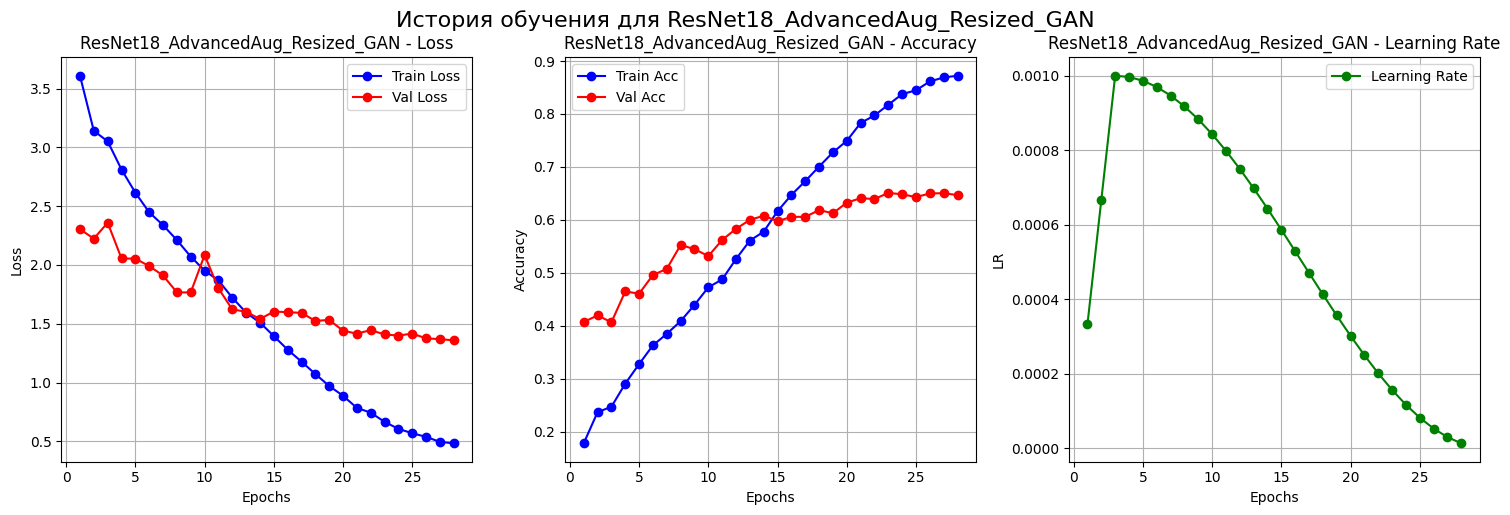

TTA: Проход 1/2...


TTA Pass 1:   0%|          | 0/30 [00:00<?, ?it/s]

TTA: Проход 2/2...


TTA Pass 2:   0%|          | 0/30 [00:00<?, ?it/s]


Точность на валидации с TTA (2 аугментаций): 0.6630

--- Сравнение результатов ---
                                   val_acc  tta_val_acc
ResNet18_AdvancedAug_Resized      0.685594     0.688749
ResNet18_AdvancedAug_Resized_GAN  0.650894     0.662986
ResNet18_BasicAug_Resized         0.652471     0.659306
SimpleCNN_BasicAug                0.375920     0.381178
SimpleCNN_AdvancedAug             0.366982     0.365405

Лучший TTA результат ДО GAN-аугментации: 0.6887
TTA результат ПОСЛЕ GAN-аугментации:   0.6630
Улучшение: -0.0258
GAN-аугментация ухудшила результат.


In [ ]:
print("\n--- Переобучение лучшей модели (ResNet18_AdvancedAug_Resized) на данных с GAN-аугментацией ---")


model_final = get_transfer_model(num_classes=NUM_CLASSES_GAN, pretrained=True).to(DEVICE) 


optimizer_final = optim.AdamW(model_final.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion_final = nn.CrossEntropyLoss()

scheduler_final = lr_scheduler.CosineAnnealingLR(optimizer_final, T_max=EPOCHS - WARMUP_EPOCHS)

model_name_final = "ResNet18_AdvancedAug_Resized_GAN"


model_final, history_final, best_val_acc_final = train_model(
    model_final, model_name_final, combined_train_loader, val_loader_final, criterion_final, optimizer_final, scheduler_final, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)


plot_history(history_final, model_name_final)


tta_acc_final = tta_validate(model_final, val_loader_final, DEVICE, n_augmentations=2)

print("\n--- Сравнение результатов ---")
if 'results' in locals():
    results[model_name_final] = {'val_acc': best_val_acc_final, 'tta_val_acc': tta_acc_final}
    results_df_final = pd.DataFrame(results).T.sort_values(by='tta_val_acc', ascending=False)
    print(results_df_final)

    best_original_tta_acc = results_df_final.drop(index=model_name_final)['tta_val_acc'].max()
    print(f"\nЛучший TTA результат ДО GAN-аугментации: {best_original_tta_acc:.4f}")
    print(f"TTA результат ПОСЛЕ GAN-аугментации:   {tta_acc_final:.4f}")
    improvement = tta_acc_final - best_original_tta_acc
    print(f"Улучшение: {improvement:.4f}")
    if improvement > 0:
        print("GAN-аугментация улучшила результат!")
    elif improvement < 0:
        print("GAN-аугментация ухудшила результат.")
    else:
        print("GAN-аугментация не изменила результат.")
else:
    print(f"Итоговая точность (Val Acc): {best_val_acc_final:.4f}")
    print(f"Итоговая точность (TTA Val Acc): {tta_acc_final:.4f}")

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models, datasets 
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm
import torch.nn as nn


KAGGLE_SAMPLE_SUBMISSION_PATH = '/content/DL 2025 Competition 1 Submission.csv'

try:
    
    temp_dataset = datasets.ImageFolder(root=TRAIN_DIR)
    class_names = temp_dataset.classes 
    num_classes = len(class_names)
    print(f"Получены имена классов из {TRAIN_DIR}. Количество: {num_classes}")
    print(f"Пример имен классов: {class_names[:5]}...{class_names[-5:]}")
    
    _ = [int(name) for name in class_names] 
    print("Проверка: Имена классов успешно конвертируются в int.")
except Exception as e:
     print(f"Ошибка при получении имен классов из {TRAIN_DIR}: {e}")
     print("Убедитесь, что TRAIN_DIR содержит папки с числовыми именами.")
     raise


BEST_MODEL_NAME = "ResNet18_AdvancedAug_Resized" 
BEST_MODEL_WEIGHTS = os.path.join(OUTPUT_DIR, f"{BEST_MODEL_NAME}_best.pth")
TRANSFER_IMG_SIZE = 224
SUBMIT_BATCH_SIZE = 128
NUM_WORKERS = 2


def get_transfer_model(num_classes=100, pretrained=False):
    model = models.resnet18(weights=None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

best_model = get_transfer_model(num_classes=num_classes, pretrained=False)

if os.path.exists(BEST_MODEL_WEIGHTS):
    print(f"Загрузка весов лучшей модели из: {BEST_MODEL_WEIGHTS}")
    best_model.load_state_dict(torch.load(BEST_MODEL_WEIGHTS, map_location=DEVICE))
else:
    raise FileNotFoundError(f"Файл весов лучшей модели не найден: {BEST_MODEL_WEIGHTS}.")

best_model.to(DEVICE)
best_model.eval()
print("Лучшая модель загружена и переведена в режим оценки.")

print("\n--- Пере-валидация загруженной модели ---")
try:
    if 'val_loader_4' in locals() and 'criterion_4' in locals() and 'validate' in locals():
        val_loss_check, val_acc_check = validate(best_model, val_loader_4, criterion_4, DEVICE)
        print(f"Пере-валидационная точность: {val_acc_check:.4f}")
        if abs(val_acc_check - 0.68) > 0.05: 
            print(f"ПРЕДУПРЕЖДЕНИЕ: Точность при пере-валидации ({val_acc_check:.4f}) значительно отличается от ожидаемой (~0.68)!")
    else:
        print("Пропуск пере-валидации: необходимые переменные (val_loader_4, criterion_4, validate) не найдены.")
except Exception as e_val:
    print(f"Ошибка во время пере-валидации: {e_val}")



transforms_test = A.Compose([
    A.Resize(height=TRANSFER_IMG_SIZE, width=TRANSFER_IMG_SIZE, interpolation=cv2.INTER_LINEAR),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

class TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_filenames = sorted([f for f in os.listdir(root_dir)
                                  if os.path.isfile(os.path.join(root_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        if not self.image_filenames:
            raise FileNotFoundError(f"В директории {root_dir} не найдено изображений.")
        print(f"Найдено {len(self.image_filenames)} тестовых изображений для обработки.")
        self.image_ids = [os.path.splitext(fname)[0] for fname in self.image_filenames]
        try:
             self.image_ids_converted = [int(id_str) for id_str in self.image_ids]
             self.ids_type = int
        except ValueError:
             self.image_ids_converted = self.image_ids
             self.ids_type = str
             print("Предупреждение: ID файлов не являются числовыми, будут использоваться как строки.")

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_filename = self.image_filenames[idx]
        img_path = os.path.join(self.root_dir, img_filename)
        img_id = self.image_ids_converted[idx]

        try:
            image = Image.open(img_path).convert('RGB')
            image_np = np.array(image)
        except Exception as e:
             print(f"Ошибка при загрузке изображения {img_path}: {e}")
             dummy_tensor = torch.zeros((3, TRANSFER_IMG_SIZE, TRANSFER_IMG_SIZE), dtype=torch.float32)
             return dummy_tensor, img_id

        if self.transform:
            augmented = self.transform(image=image_np)
            image_tensor = augmented['image']
        else:
            image_tensor = ToTensorV2()(image=image_np)['image']

        return image_tensor, img_id

test_dataset = TestDataset(TEST_DIR, transform=transforms_test)
test_loader = DataLoader(test_dataset, batch_size=SUBMIT_BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)


predictions_map = {} 

print("\nНачало предсказания на тестовых данных...")
with torch.no_grad():
    for inputs, ids_batch in tqdm(test_loader, desc="Predicting"):
        inputs = inputs.to(DEVICE)
        outputs = best_model(inputs)
        
        _, preds_indices = torch.max(outputs, 1)

        for img_id, pred_idx in zip(ids_batch.cpu().numpy() if test_dataset.ids_type == int else ids_batch,
                                    preds_indices.cpu().numpy()):
            
            predicted_class_name_str = class_names[pred_idx]
            
            try:
                 predicted_class_name_int = int(predicted_class_name_str)
                 predictions_map[img_id] = predicted_class_name_int
            except ValueError:
                 print(f"Ошибка: Не удалось конвертировать имя класса '{predicted_class_name_str}' в int для ID {img_id}. Пропускаем.")



print("\n--- Формирование файла сабмишна ---")

sample_df = pd.read_csv(KAGGLE_SAMPLE_SUBMISSION_PATH)
print(f"Загружен sample_submission: {KAGGLE_SAMPLE_SUBMISSION_PATH} с {len(sample_df)} строками.")
id_col_type_sample = sample_df['id'].dtype
id_col_type_pred = test_dataset.ids_type
print(f"Тип ID в sample_submission: {id_col_type_sample}, Тип ID в предсказаниях: {id_col_type_pred}")


if id_col_type_sample != id_col_type_pred:
    print("Предупреждение: Типы ID не совпадают. Попытка приведения ключей словаря к типу из sample_submission...")
    try:
        predictions_map_typed = {id_col_type_sample.type(k): v for k, v in predictions_map.items()}
        predictions_map = predictions_map_typed
        print("Типы ID успешно приведены.")
    except Exception as e_type:
        print(f"Ошибка приведения типов ID: {e_type}. Сабмишн может быть неверным.")


sample_df['target'] = sample_df['id'].map(predictions_map)

if sample_df['target'].isnull().any():
    missing_count = sample_df['target'].isnull().sum()
    print(f"ВНИМАНИЕ: Обнаружены пропущенные предсказания для {missing_count} ID из sample_submission!")
    print("Заполняем пропущенные предсказания нулем (0).")
    sample_df['target'].fillna(0, inplace=True)

sample_df['target'] = sample_df['target'].astype(int)

final_submission_df = sample_df
submission_path = os.path.join(OUTPUT_DIR, 'submission_pytorch_merged_v2_fixed_mapping.csv') 
final_submission_df.to_csv(submission_path, index=False)

print(f"Файл сабмишна успешно сохранен: {submission_path}")
print("Первые 5 строк сабмишна:")
print(final_submission_df.head())
final_submission_df.info()


--- Шаг 5 (Исправленный v2): Генерация файла сабмишна с правильным отображением классов ---
Получены имена классов из /content/dataset_extracted/train. Количество: 100
Пример имен классов: ['0', '1', '10', '11', '12']...['95', '96', '97', '98', '99']
Проверка: Имена классов успешно конвертируются в int.
Загрузка весов лучшей модели из: /content/output/ResNet18_AdvancedAug_Resized_best.pth
Лучшая модель загружена и переведена в режим оценки.

--- Пере-валидация загруженной модели ---


Validating:   0%|          | 0/30 [00:00<?, ?it/s]

Пере-валидационная точность: 0.6856
Найдено 3878 тестовых изображений для обработки.

Начало предсказания на тестовых данных...


Predicting:   0%|          | 0/31 [00:00<?, ?it/s]

Предсказания получены для 3878 изображений.

--- Формирование файла сабмишна ---
Загружен sample_submission: /content/DL 2025 Competition 1 Submission.csv с 3878 строками.
Тип ID в sample_submission: int64, Тип ID в предсказаниях: <class 'int'>
Файл сабмишна успешно сохранен: /content/output/submission_pytorch_merged_v2_fixed_mapping.csv
Первые 5 строк сабмишна:
   id  target
0   0      71
1   1      62
2   2      39
3   3      41
4   4      66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3878 entries, 0 to 3877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3878 non-null   int64
 1   target  3878 non-null   int64
dtypes: int64(2)
memory usage: 60.7 KB

--- Шаг 5 (Исправленный v2) завершен ---


In [ ]:
import os
import zipfile
import random
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset, Subset, ConcatDataset
from torchvision import datasets, models, transforms
from torchvision.models import Wide_ResNet50_2_Weights 
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm.notebook import tqdm 

print("--- Блок 0: Импорты и Настройки ---")



ZIP_FILE_PATH = '/content/Kaggle 2025 Competition Data.zip'

EXTRACTION_DIR = '/content/dataset_extracted'

BASE_DIR = EXTRACTION_DIR

SUBMISSION_FILE = '/content/DL 2025 Competition 1 Submission.csv'

OUTPUT_DIR = '/content/output_wideresnet/'


if not os.path.exists(os.path.join(EXTRACTION_DIR, 'train')): 
    print(f"--- Распаковка данных из {ZIP_FILE_PATH} ---")
    try:
        if not os.path.exists(EXTRACTION_DIR):
            os.makedirs(EXTRACTION_DIR)
            print(f"Создана директория: {EXTRACTION_DIR}")
        with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
            zip_ref.extractall(EXTRACTION_DIR)
        print(f"Данные успешно распакованы в {EXTRACTION_DIR}")
        
        if 'data' in os.listdir(EXTRACTION_DIR) and os.path.isdir(os.path.join(EXTRACTION_DIR, 'data')):
             print("Обнаружена подпапка 'data', корректируем BASE_DIR...")
             BASE_DIR = os.path.join(EXTRACTION_DIR, 'data')

    except FileNotFoundError:
        print(f"ОШИБКА: ZIP-файл не найден по пути {ZIP_FILE_PATH}")
        raise
    except Exception as e:
        print(f"ОШИБКА: Не удалось распаковать архив: {e}")
        raise
else:
    print(f"Директория {EXTRACTION_DIR}/train уже существует, распаковка пропущена.")
    
    if 'data' in os.listdir(EXTRACTION_DIR) and os.path.isdir(os.path.join(EXTRACTION_DIR, 'data')):
         BASE_DIR = os.path.join(EXTRACTION_DIR, 'data')


TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')

if not os.path.isdir(TRAIN_DIR):
    raise FileNotFoundError(f"Директория TRAIN_DIR не найдена: {TRAIN_DIR}. Проверьте результат распаковки и структуру архива.")
if not os.path.isdir(TEST_DIR):
     raise FileNotFoundError(f"Директория TEST_DIR не найдена: {TEST_DIR}. Проверьте результат распаковки.")
if not os.path.isfile(SUBMISSION_FILE):
    raise FileNotFoundError(f"Файл sample_submission не найден: {SUBMISSION_FILE}")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Создана директория для вывода: {OUTPUT_DIR}")

print(f"Используется TRAIN_DIR: {TRAIN_DIR}")
print(f"Используется TEST_DIR: {TEST_DIR}")
print(f"Используется SUBMISSION_FILE: {SUBMISSION_FILE}")
print(f"Используется OUTPUT_DIR: {OUTPUT_DIR}")

In [ ]:
SEED = 42
VALID_SPLIT = 0.2       
IMG_SIZE = 32           
TARGET_IMG_SIZE = 224   
BATCH_SIZE = 32         
NUM_WORKERS = 2
EPOCHS = 40             
LR = 1e-4               
WEIGHT_DECAY = 1e-3     
SCHEDULER_STEP = 10     
SCHEDULER_GAMMA = 0.1   
LABEL_SMOOTHING = 0.1   
EARLY_STOPPING_PATIENCE = 7 
WARMUP_EPOCHS = 3


random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = False    

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {DEVICE}")


print("\n--- Блок 1: Аугментации и Датасеты ---")


RESIZE_INTERPOLATION = cv2.INTER_CUBIC


transforms_train = A.Compose([
    A.Resize(height=TARGET_IMG_SIZE, width=TARGET_IMG_SIZE, interpolation=RESIZE_INTERPOLATION),
    A.HorizontalFlip(p=0.5),
    
    A.ShiftScaleRotate(shift_limit=0.08, scale_limit=0.15, rotate_limit=20, p=0.7,
                       border_mode=cv2.BORDER_REFLECT),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.6),
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=15, p=0.4),
    
    A.CoarseDropout(max_holes=10, max_height=int(TARGET_IMG_SIZE*0.1), max_width=int(TARGET_IMG_SIZE*0.1),
                    min_holes=1, min_height=int(TARGET_IMG_SIZE*0.05), min_width=int(TARGET_IMG_SIZE*0.05),
                    fill_value=0, p=0.5), 
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    ToTensorV2(),
])


transforms_val_test = A.Compose([
    A.Resize(height=TARGET_IMG_SIZE, width=TARGET_IMG_SIZE, interpolation=RESIZE_INTERPOLATION),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])


class ImageFolderAlbumentations(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        self.image_folder = datasets.ImageFolder(root=root, target_transform=target_transform)
        self.transform = transform
        self.classes = self.image_folder.classes
        self.class_to_idx = self.image_folder.class_to_idx
        self.samples = self.image_folder.samples
        self.targets = self.image_folder.targets 

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            image_np = np.array(image) 

            if self.transform:
                augmented = self.transform(image=image_np)
                image_tensor = augmented['image']
            else:
                image_tensor = ToTensorV2()(image=image_np)['image'] 

        except Exception as e:
            print(f"Error loading image {img_path}: {e}. Returning dummy tensor.")
            
            
            
            image_tensor = torch.zeros((3, TARGET_IMG_SIZE, TARGET_IMG_SIZE)) 
            target = -1 

        return image_tensor, target


print("Создание полного датасета для разделения...")
full_dataset_no_transform = ImageFolderAlbumentations(root=TRAIN_DIR)
num_classes = len(full_dataset_no_transform.classes)
class_names = full_dataset_no_transform.classes 
print(f"Обнаружено {num_classes} классов. Пример: {class_names[:5]}")
print(f"Общий размер датасета: {len(full_dataset_no_transform)}")


targets = full_dataset_no_transform.targets
train_idx, val_idx = train_test_split(
    np.arange(len(targets)),
    test_size=VALID_SPLIT,
    shuffle=True,
    stratify=targets,
    random_state=SEED
)
print(f"Размер обучающей выборки (индексы): {len(train_idx)}")
print(f"Размер валидационной выборки (индексы): {len(val_idx)}")


def create_dataloaders(train_indices, val_indices, root_dir,
                       train_transform, val_transform, batch_size, num_workers):
    
    
    

    train_dataset = Subset(ImageFolderAlbumentations(root=root_dir, transform=train_transform), train_indices)
    val_dataset = Subset(ImageFolderAlbumentations(root=root_dir, transform=val_transform), val_indices)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True, drop_last=True) 
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, val_loader


train_loader, val_loader = create_dataloaders(
    train_idx, val_idx, TRAIN_DIR, transforms_train, transforms_val_test,
    BATCH_SIZE, NUM_WORKERS
)
print(f"Созданы Train/Val DataLoaders. Batch size: {BATCH_SIZE}")
print(f"Размер Train Loader: {len(train_loader)} батчей")
print(f"Размер Val Loader: {len(val_loader)} батчей")


print("\n--- Блок 2: Определение Модели WideResNet ---")

def get_wideresnet_model(num_classes=100, pretrained=True):
    print(f"Загрузка WideResNet50_2 {'с предобученными весами ImageNet' if pretrained else 'без предобученных весов'}")
    weights = Wide_ResNet50_2_Weights.IMAGENET1K_V1 if pretrained else None
    model = models.wide_resnet50_2(weights=weights)

    
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    print(f"Последний слой заменен на nn.Linear({num_ftrs}, {num_classes})")
    return model

model = get_wideresnet_model(num_classes=num_classes, pretrained=True)
model.to(DEVICE) 


print("\n--- Блок 3: Функции Обучения и Валидации ---")




def train_one_epoch(model, train_loader, criterion, optimizer, device, current_epoch, total_epochs, warmup_epochs, base_lr, scheduler=None):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    
    if current_epoch < warmup_epochs:
        lr = base_lr * (current_epoch + 1) / warmup_epochs
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        current_lr = lr
    else:
        
        current_lr = optimizer.param_groups[0]['lr']

    progress_bar = tqdm(train_loader, desc=f"Epoch {current_epoch+1}/{total_epochs} (Train) LR={current_lr:.1e}", leave=False)

    for inputs, labels in progress_bar:
        
        valid_idx = labels != -1
        if not valid_idx.all():
            print(f"Warning: Skipping {sum(~valid_idx)} samples due to loading errors in batch.")
            inputs = inputs[valid_idx]
            labels = labels[valid_idx]
            if inputs.size(0) == 0:
                 continue 

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        
        
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels.data)
        total_samples += inputs.size(0)

        progress_bar.set_postfix(loss=f"{loss.item():.4f}")

    epoch_loss = running_loss / total_samples if total_samples > 0 else 0
    epoch_acc = correct_predictions.double() / total_samples if total_samples > 0 else 0

    
    if scheduler and current_epoch >= warmup_epochs:
         
         scheduler.step()
         

    return epoch_loss, epoch_acc.item()

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    progress_bar = tqdm(val_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for inputs, labels in progress_bar:
            valid_idx = labels != -1
            if not valid_idx.all():
                inputs = inputs[valid_idx]
                labels = labels[valid_idx]
                if inputs.size(0) == 0:
                    continue

            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels) 

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
            total_samples += inputs.size(0)

    epoch_loss = running_loss / total_samples if total_samples > 0 else 0
    epoch_acc = correct_predictions.double() / total_samples if total_samples > 0 else 0

    return epoch_loss, epoch_acc.item()


def train_model(model, model_name, train_loader, val_loader, criterion, optimizer, scheduler, device,
                num_epochs, output_dir, warmup_epochs, base_lr, early_stopping_patience):

    print(f"\n--- Обучение модели: {model_name} ---")
    start_time = time.time()

    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}
    best_val_acc = 0.0
    best_model_state = None
    epochs_no_improve = 0
    best_epoch = -1

    model.to(device)

    for epoch in range(num_epochs):
        
        train_loss, train_acc = train_one_epoch(
            model, train_loader, criterion, optimizer, device,
            epoch, num_epochs, warmup_epochs, base_lr, scheduler if epoch >= warmup_epochs else None
        )

        
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        current_lr = optimizer.param_groups[0]['lr']
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['lr'].append(current_lr)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} | LR: {current_lr:.1e}")

        
        
        

        
        if val_acc > best_val_acc:
            print(f"Validation accuracy улучшилась ({best_val_acc:.4f} --> {val_acc:.4f}). Сохранение модели...")
            best_val_acc = val_acc
            best_model_state = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
            best_epoch = epoch + 1
            
            best_model_path = os.path.join(output_dir, f'{model_name}_best.pth')
            torch.save(best_model_state, best_model_path)
            print(f"Лучшая модель сохранена в: {best_model_path}")
        else:
            epochs_no_improve += 1
            print(f"Validation accuracy не улучшилась. Счетчик: {epochs_no_improve}/{early_stopping_patience}")

        
        if epochs_no_improve >= early_stopping_patience:
            print(f"\nРанняя остановка на эпохе {epoch+1}. Лучшая Val Acc: {best_val_acc:.4f} (на эпохе {best_epoch})")
            break

    
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Загружена лучшая модель с эпохи {best_epoch} (Val Acc: {best_val_acc:.4f})")
    else:
        print("Лучшая модель не была сохранена (возможно, обучение прервано или не было улучшений).")


    time_elapsed = time.time() - start_time
    print(f'\nОбучение {model_name} завершено за {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Лучшая Val Acc для {model_name}: {best_val_acc:4f}')

    return model, history, best_val_acc




print("\n--- Блок 4: Настройка Обучения ---")
MODEL_NAME = "WideResNet50_AdvancedAug_Resized_LS"



optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
print(f"Оптимизатор: AdamW (LR={LR}, WeightDecay={WEIGHT_DECAY})")


criterion = nn.CrossEntropyLoss(label_smoothing=LABEL_SMOOTHING)
print(f"Функция потерь: CrossEntropyLoss (Label Smoothing={LABEL_SMOOTHING})")



scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS - WARMUP_EPOCHS, eta_min=LR * 0.01) 




print(f"Планировщик LR: CosineAnnealingLR (T_max={EPOCHS - WARMUP_EPOCHS}, Warmup={WARMUP_EPOCHS} эпох)")


print("\n--- Блок 5: Запуск Обучения ---")


trained_model, history, best_val_acc = train_model(
    model, MODEL_NAME, train_loader, val_loader, criterion, optimizer, scheduler, DEVICE,
    EPOCHS, OUTPUT_DIR, WARMUP_EPOCHS, LR, EARLY_STOPPING_PATIENCE
)



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models 
from torchvision.models import Wide_ResNet50_2_Weights 
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm.notebook import tqdm 

print("--- Блок 0: Импорты и Настройки ---")

BASE_DIR = '/content/dataset_extracted' 
TRAIN_DIR = os.path.join(BASE_DIR, 'train') 
TEST_DIR = os.path.join(BASE_DIR, 'test')

SUBMISSION_FILE = '/content/DL 2025 Competition 1 Submission.csv'

OUTPUT_DIR = '/content/output_wideresnet/' 

MODEL_NAME = "WideResNet50_AdvancedAug_Resized_LS" 

BEST_MODEL_WEIGHTS_PATH = os.path.join(OUTPUT_DIR, f'{MODEL_NAME}_best.pth')


TARGET_IMG_SIZE = 224   
SUBMIT_BATCH_SIZE = 64  
NUM_WORKERS = 2

RESIZE_INTERPOLATION = cv2.INTER_CUBIC


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {DEVICE}")

print("\n--- Блок 1: Имена классов и Трансформации ---")


try:
    temp_dataset = datasets.ImageFolder(root=TRAIN_DIR)
    class_names = temp_dataset.classes 
    num_classes = len(class_names)
    idx_to_class = {i: name for i, name in enumerate(class_names)} 
    print(f"Получены имена классов из {TRAIN_DIR}. Количество: {num_classes}")
    print(f"Пример имен классов: {class_names[:5]}...{class_names[-5:]}")
    
    _ = [int(name) for name in class_names]
    print("Проверка: Имена классов успешно конвертируются в int.")
except Exception as e:
     print(f"Ошибка при получении имен классов из {TRAIN_DIR}: {e}")
     print("Убедитесь, что TRAIN_DIR содержит папки с числовыми именами ['0', '1', ..., '99'].")
     raise


transforms_test = A.Compose([
    A.Resize(height=TARGET_IMG_SIZE, width=TARGET_IMG_SIZE, interpolation=RESIZE_INTERPOLATION),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    ToTensorV2(),
])
print("Трансформации для тестовых данных определены.")


print("\n--- Блок 2: Загрузка Модели ---")


def get_wideresnet_model(num_classes=100, pretrained=False): 
    print(f"Создание архитектуры WideResNet50_2 для {num_classes} классов.")
    
    model = models.wide_resnet50_2(weights=None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model


submission_model = get_wideresnet_model(num_classes=num_classes, pretrained=False)


print(f"Загрузка весов из файла: {BEST_MODEL_WEIGHTS_PATH}")
submission_model.load_state_dict(torch.load(BEST_MODEL_WEIGHTS_PATH, map_location=DEVICE))
print("Веса успешно загружены.")


submission_model.eval()
submission_model.to(DEVICE)
print(f"Модель переведена в режим eval и перемещена на {DEVICE}.")



print("\n--- Блок 3: Test Dataset и DataLoader ---")

class TestDataset(Dataset):
    def __init__(self, root_dir, sample_submission_path, idx_to_class_map, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.idx_to_class = idx_to_class_map 
        self.image_filenames = sorted([f for f in os.listdir(root_dir)
                                  if os.path.isfile(os.path.join(root_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        if not self.image_filenames:
            raise FileNotFoundError(f"В директории {root_dir} не найдено изображений.")
        print(f"Найдено {len(self.image_filenames)} тестовых изображений.")

        
        self.image_ids_str = [os.path.splitext(fname)[0] for fname in self.image_filenames]

        
        self.sample_submission_df = pd.read_csv(sample_submission_path)
        id_col_type_sample = self.sample_submission_df['id'].dtype

        self.image_ids = []
        self.ids_type = None
        try:
            
            self.image_ids = [id_col_type_sample.type(id_str) for id_str in self.image_ids_str]
            self.ids_type = id_col_type_sample.type
            print(f"ID тестовых файлов успешно приведены к типу {self.ids_type} из sample submission.")
        except ValueError:
            print(f"Предупреждение: Не удалось привести ID тестовых файлов к типу {id_col_type_sample}. Используются строки.")
            self.image_ids = self.image_ids_str
            self.ids_type = str

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_filename = self.image_filenames[idx]
        img_path = os.path.join(self.root_dir, img_filename)
        img_id = self.image_ids[idx] 

        try:
            image = Image.open(img_path).convert('RGB')
            image_np = np.array(image)
        except Exception as e:
             print(f"Ошибка при загрузке изображения {img_path}: {e}. Возвращаем dummy тензор.")
             
             dummy_tensor = torch.zeros((3, TARGET_IMG_SIZE, TARGET_IMG_SIZE), dtype=torch.float32)
             
             return dummy_tensor, img_id

        if self.transform:
            try:
                augmented = self.transform(image=image_np)
                image_tensor = augmented['image']
            except Exception as e_aug:
                 print(f"Ошибка при аугментации изображения {img_path}: {e_aug}. Возвращаем dummy тензор.")
                 dummy_tensor = torch.zeros((3, TARGET_IMG_SIZE, TARGET_IMG_SIZE), dtype=torch.float32)
                 return dummy_tensor, img_id
        else:
             
             raise ValueError("Transformations must be provided for TestDataset during prediction!")

        return image_tensor, img_id


test_dataset = TestDataset(TEST_DIR, SUBMISSION_FILE, idx_to_class, transform=transforms_test)


test_loader = DataLoader(test_dataset, batch_size=SUBMIT_BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
print(f"Создан Test Dataloader. Batch size: {SUBMIT_BATCH_SIZE}")


print("\n--- Блок 4: Получение Предсказаний ---")

predictions_map = {} 

submission_model.eval() 
with torch.no_grad():
    for inputs, ids_batch in tqdm(test_loader, desc="Predicting"):
        
        if inputs.size(0) == 0:
            print("Пропущен пустой батч (возможно, ошибки загрузки)")
            continue

        inputs = inputs.to(DEVICE)
        outputs = submission_model(inputs)
        
        _, preds_indices = torch.max(outputs, 1)

        
        ids_list = ids_batch.cpu().numpy() if isinstance(ids_batch, torch.Tensor) else ids_batch

        for img_id, pred_idx in zip(ids_list, preds_indices.cpu().numpy()):
            
            
            predicted_class_name_str = test_dataset.idx_to_class.get(pred_idx, '0') 

            
            try:
                 predicted_class_int = int(predicted_class_name_str)
            except ValueError:
                 
                 print(f"Критическая Ошибка: Не удалось конвертировать имя класса '{predicted_class_name_str}' в int для ID {img_id}. Используем 0.")
                 predicted_class_int = 0 

            predictions_map[img_id] = predicted_class_int

print(f"Предсказания получены для {len(predictions_map)} изображений.")
if len(predictions_map) < len(test_dataset):
     print(f"ВНИМАНИЕ: Количество предсказаний ({len(predictions_map)}) меньше количества тестовых файлов ({len(test_dataset)}). Возможны ошибки загрузки изображений.")



print("\n--- Блок 5: Формирование и Сохранение Сабмишна ---")


sample_df = test_dataset.sample_submission_df
print(f"Используется sample_submission: {SUBMISSION_FILE} с {len(sample_df)} строками.")
print(f"Тип колонки 'id' в sample_submission: {sample_df['id'].dtype}")
print(f"Тип ключей в словаре предсказаний: {test_dataset.ids_type}")


if sample_df['id'].dtype != test_dataset.ids_type:
     print("Критическое Предупреждение: Типы ID в sample submission и предсказаниях не совпадают! Попытка приведения...")
     try:
         predictions_map_typed = {sample_df['id'].dtype.type(k): v for k, v in predictions_map.items()}
         predictions_map = predictions_map_typed
         print(f"Типы ID в предсказаниях приведены к {sample_df['id'].dtype}.")
     except Exception as e:
         print(f"Ошибка приведения типов ID: {e}. Сабмишн может быть неверным.")



sample_df['target'] = sample_df['id'].map(predictions_map)


missing_count = sample_df['target'].isnull().sum()
if missing_count > 0:
    print(f"ВНИМАНИЕ: Обнаружены пропущенные предсказания для {missing_count} ID из sample_submission!")
    
    sample_df['target'].fillna(0, inplace=True)
    print("Пропущенные предсказания заполнены нулем (0).")


sample_df['target'] = sample_df['target'].astype(int)


submission_filename = f'submission_{MODEL_NAME}_final.csv' 
submission_path = os.path.join(OUTPUT_DIR, submission_filename)
sample_df.to_csv(submission_path, index=False)

print(f"\nФайл сабмишна успешно сохранен: {submission_path}")
print("Первые 5 строк сабмишна:")
print(sample_df.head())
print("\nИнформация о сабмишне:")
sample_df.info()

print("\n--- Создание сабмишна завершено ---")